<a href="https://colab.research.google.com/github/ruialbertovrocha/bus_galicia/blob/main/Bus_Galicia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Abstract***

El autobús asume un papel muy importante en los movimientos diarios de las poblaciones gallegas. Esto se aplica tanto para trabajadores como para estudiantes y tanto para poblaciones rurales como urbanas.

Sin embargo, las diversas líneas de autobuses tienen tendencias y comportamientos distintos, ya sea por su naturaleza, extensión, frecuencias y horarios.

Con este trabajo pretendemos, por un lado, analizar las tendencias de varias líneas de autobuses y, por otro, construir un modelo que permita predecir el número de viajeros de una determinada línea. Este modelo presenta una gran utilidad en la medida en que permite optimizar la planificación operacional y financiera.



# **1 . Introducción**

**1.1 Metodología**

Este proyecto pretende analizar los diversos datos de varias líneas de autobuses en Galicia. Estos datos fueron extraídos automáticamente de las máquinas perceptoras de los autobuses desde septiembre de 2021 a septiembre de 2022.

En la ejecución de este trabajo seguimos los siguientes pasos:



*   Limpieza de datos y feature engineering
*   Análisis de datos separando rutas regulares y escolares
*   Creación de un modelo

Antes de empezar hicimos algún trabajo previo. Es decir, decidimos cambiar el nombre de las rutas y los números de conductores y autobuses para salvaguadar la privacidad de los datos.

Luego, decidimos borrar tres tipos de datos:


1.   Datos vacíos, especialmente, los relativos a la fecha y horario.
2.   Datos corrompidos, en particular, en las columnas que contienen horas (de salida) en los cuales falta el campo de horas (ejemplo: :34:20). Columnas: HORA y HSALIDA.
3.   Rutas cubiertas por taxis.

Estas operaciones las hicimos previamente en Excel.














**1.2 Descripción de la base de datos**

El dataset está compuesto por las siguientes columnas:

CONDUCTOR: Número de conductor.

HORA: Hora de salida prevista.

BUS: Número de bus.

VIAJEROS: Viajeros transportados.

RECAUDAC: Recaudación en efectivo.

RECAUDACTJT: Recaudación con tarjeta de transporte.

SALIDA: Fecha de salida.

HSALIDA: Hora en la cual la línea fue introducida en la máquina perceptora.

HLLEGADA: Hora en la cual la línea fue cerrada en la máquina perceptora.

TIPO_DIA: Tipo de día (1- Domingo, 2- Lunes, etc.)

RUTA: Indentificación de la ruta. Los números finales (1 o 2) representan los diferentes sentidos. El 1 es la ida y el 2 la vuelta. Por ida consideramos las expediciones que van en dirección a las ciudades y pueblos más grandes y a los colegios.

KM: Distancia del recorrido.

TIPO_DE_RUTA: Tipo de ruta, es decir, si es regular o escolar.

MOTIVO: Esta columna representa el motivo por el cual la línea fue mal introducida en la máquina o no introducida de todo.

Otras columnas van siendo agregadas, borradas y cambiadas a lo largo del análisis.



#**2. Importación y limpieza de los datos**




**2.1 importación de datos**

In [3]:
#Importamos la biblioteca pandas.

import pandas as pd


In [4]:
#Cargamos el archivo csv y nombramos el dataset como bus.

bus = pd.read_csv('/content/proyecto_bus_CS.csv')

In [5]:
#Comprobamos que el archivo fue bien cargado.

bus.head()

,CONDCUTOR,HORA,Bus,VIAJEROS,RECAUDA,RECAUDATJT,SALIDA,HSALIDA,HLLEGADA,TIPO_DIA,RUTA,KM,TIPO_DE_RUTA,MOTIVO
0,2,7:30,2096,5,9.0,1.35,23-09-2021,07:26:00,08:06:00,5,R13-33-1,32,REGULAR,NaN
1,2,8:35,2096,15,0.0,0.00,23-09-2021,08:24:00,09:00:00,5,R13-12-1,12,ESCOLAR,NaN
2,2,9:10,2096,1,1.5,0.00,23-09-2021,09:01:00,09:50:00,5,R13-4-1,11,REGULAR,NaN
3,2,10:30,2096,0,0.0,0.00,23-09-2021,10:20:00,10:43:00,5,R12-25-1,21,REGULAR,NaN
4,2,10:45,2096,3,7.5,0.00,23-09-2021,10:45:00,12:21:00,5,R13-1-2,65,REGULAR,NaN


***2.2 Limpieza de datos y feature engineering***

2.2.1 Limpieza de datos

In [6]:
#Hemos percibido que el título de la columna CONDUCTOR estaba mal escrita y que la columna BUS estaba en minúsculas.

bus = bus.rename(columns={'CONDCUTOR': 'CONDUCTOR'})
bus = bus.rename(columns={'Bus': 'BUS'})

In [7]:
#Borramos la columna MOTIVO por su poca importancia para el análisis.

bus = bus.drop('MOTIVO', axis=1)

In [8]:
#Solicitamos a pandas una primera descripción de los datos.

bus.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,TIPO_DIA,KM
count,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000
mean,45.628835,2728.376426,13.074039,4.360711,3.870839,3.997299,24.370423
std,26.746313,1302.198211,13.512150,9.467096,7.629374,1.584028,16.601974
min,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,21.000000,2046.000000,2.000000,0.000000,0.000000,3.000000,15.000000
50%,47.000000,2494.000000,9.000000,0.000000,0.880000,4.000000,16.000000
75%,70.000000,3299.000000,20.000000,4.650000,4.950000,5.000000,32.000000
max,90.000000,9299.000000,169.000000,1004.640000,109.600000,7.000000,65.000000


In [9]:
#Solicitamos a pandas el tipo de datos con los cuales estamos trabajando.

print(bus.dtypes)

CONDUCTOR         int64
HORA             object
BUS               int64
VIAJEROS          int64
RECAUDA         float64
RECAUDATJT      float64
SALIDA           object
HSALIDA          object
HLLEGADA         object
TIPO_DIA          int64
RUTA             object
KM                int64
TIPO_DE_RUTA     object
dtype: object


In [10]:
#Solicitamos a pandas los valores nulos por columna.

nulos_conductor = bus['CONDUCTOR'].isnull().sum()
nulos_hora = bus['HORA'].isnull().sum()
nulos_bus = bus['BUS'].isnull().sum()
nulos_viajeros = bus['VIAJEROS'].isnull().sum()
nulos_salida = bus['SALIDA'].isnull().sum()
nulos_hsalida = bus['HSALIDA'].isnull().sum()
nulos_hllegada = bus['HLLEGADA'].isnull().sum()
nulos_tipo_dia = bus['TIPO_DIA'].isnull().sum()
nulos_ruta = bus['RUTA'].isnull().sum()
nulos_tipo_ruta = bus['TIPO_DE_RUTA'].isnull().sum()
nulos_km = bus['KM'].isnull().sum()
print(nulos_conductor)
print(nulos_hora)
print(nulos_bus)
print(nulos_viajeros)
print(nulos_salida)
print(nulos_hsalida)
print(nulos_hllegada)
print(nulos_ruta)
print(nulos_tipo_ruta)
print(nulos_km)

0
0
0
0
0
0
0
0
472
0


In [11]:
#Nos damos cuenta de que la columna TIPO_DE_RUTA tiene 472 valores nulos.
#Solicitamos a pandas que nos diga qué tipo de valores tenemos en la columna TIPO_DE_RUTA.

valores_unicos_tipo_ruta = bus["TIPO_DE_RUTA"].unique()
print(valores_unicos_tipo_ruta)

['REGULAR' 'ESCOLAR' nan]


In [12]:
#Solicitamos a pandas que nos diga a qué ruta corresponden los valores nulos.

nulos_tipo_ruta_loc = bus.loc[bus['TIPO_DE_RUTA'].isnull()]

#Quisimos saber cuáles eran las entradas de RUTA que tenían valores nulos en TIPO_DE_RUTA.
rutas_tipo_nulo = nulos_tipo_ruta_loc['RUTA'].unique()
print(rutas_tipo_nulo)

['R12-42-2' 'R12-42-1']


Por algún motivo no atribuimos el tipo de ruta a la ruta R12-42. Se trata de una línea regular.



In [13]:
#Cambiamos los valores nulos por 'REGULAR'

bus['TIPO_DE_RUTA'] = bus['TIPO_DE_RUTA'].fillna('REGULAR')

#Volvemos a verificar si quedaron valores nulos en la columna TIPO_DE_RUTA.

nulos_tipo_ruta = bus['TIPO_DE_RUTA'].isnull().sum()

print(nulos_tipo_ruta)

0


In [14]:
#Verificamos si existen valores duplicados y los contamos.

duplicados = bus.duplicated()
duplicados_sum = bus.duplicated().sum()
print(duplicados)
print(duplicados_sum)

0        False
1        False
2        False
3        False
4        False
         ...  
56641    False
56642    False
56643    False
56644    False
56645    False
Length: 56646, dtype: bool
3022


In [15]:
#Tenemos 3022 valores duplicados y los borramos.

bus = bus.drop_duplicates()

#Volvemos a verificar y a contar los valores duplicados.

duplicados = bus.duplicated()
duplicados_sum = bus.duplicated().sum()
print(duplicados)
print(duplicados_sum)

0        False
1        False
2        False
3        False
4        False
         ...  
56641    False
56642    False
56643    False
56644    False
56645    False
Length: 53624, dtype: bool
0


In [16]:
#Los datos que disponemos tienen algunas lagunas, es decir, hubo días en que no fue posible recoger datos.
#Para corregir esos fallos decidimos cubrirlos con los datos de días similares,\
#es decir, con el mismo tipo de día de la semana y en días cercanos.

#02/11
fecha_origen = '26-10-2021' #Fecha con datos que vamos a usar para cubrir la fecha sin datos.
fecha_destino = '02-11-2021' #Fecha sin datos.

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy() #Creamos un nuevo dataset donde el valor en la columna 'SALIDA' coincide con fecha_origen.
datos_origen['SALIDA'] = fecha_destino #Pasamos los datos anteriores para fecha_destino.
bus = pd.concat([bus, datos_origen], ignore_index=True) #Agregamos los datos de fecha_destino a nuestro dataframe.

#Repetimos la operación para las siguientes fechas.

#03/11
fecha_origen = '27-10-2021'
fecha_destino = '03-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#04/11
fecha_origen = '28-10-2021'
fecha_destino = '04-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#05/11
fecha_origen = '29-10-2021'
fecha_destino = '05-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#06/11
fecha_origen = '30-10-2021'
fecha_destino = '06-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#07/11
fecha_origen = '31-10-2021'
fecha_destino = '07-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#08/11

fecha_origen = '25-10-2021'
fecha_destino = '08-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#09/11

fecha_origen = '26-10-2021'
fecha_destino = '09-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#14/11

fecha_origen = '31-10-2021'
fecha_destino = '14-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#04/05

fecha_origen = '27-04-2022'
fecha_destino = '04-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#05/05

fecha_origen = '28-04-2022'
fecha_destino = '05-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#06/05

fecha_origen = '29-04-2022'
fecha_destino = '06-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#07/05

fecha_origen = '30-04-2022'
fecha_destino = '07-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#08/05

fecha_origen = '24-04-2022'
fecha_destino = '08-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#09/05

fecha_origen = '25-04-2022'
fecha_destino = '09-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#10/05

fecha_origen = '26-04-2022'
fecha_destino = '10-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#11/05

fecha_origen = '27-04-2022'
fecha_destino = '11-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#12/05

fecha_origen = '28-04-2022'
fecha_destino = '12-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#13/05

fecha_origen = '29-04-2022'
fecha_destino = '13-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#14/05

fecha_origen = '30-04-2022'
fecha_destino = '14-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#15/05

fecha_origen = '24-04-2022'
fecha_destino = '15-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#21/06

fecha_origen = '16-06-2022'
fecha_destino = '21-06-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#14/08

fecha_origen = '07-08-2022'
fecha_destino = '14-08-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)



In [17]:
#Quisimos crear una columna MES para tener datos sobre el mes en el que se realizó cada ruta.
#Convertimos la columna SALIDA en formato fecha y luego creamos la columna MES en una string en formato mes/año.

bus['SALIDA'] = pd.to_datetime(bus['SALIDA'], format='%d-%m-%Y')

bus['MES'] = bus['SALIDA'].dt.strftime('%m/%Y')


In [18]:
#Seguidamente volvemos a cambiar el formato de la columna MES para fecha.

bus['MES'] = pd.to_datetime(bus['MES'], format='%m/%Y')

In [19]:
#Creamos la columna RECAUDA_TOTAL que no es más que la suma de RECAUDA con RECAUDATJT.

bus['RECAUDA_TOTAL'] = bus['RECAUDA'] + bus['RECAUDATJT']

In [20]:
#Creamos la columna VIAJEROS/KM multiplicando el número de viajeros por los km de la ruta.

bus['VIAJEROS/KM'] = bus['VIAJEROS']*bus['KM']

In [21]:
#La ruta R12-47 y la ruta R12-23 son prácticamente idénticas y son complementarias.
#Para el análisis es más adecuado que estén juntas.

bus['RUTA'] = bus['RUTA'].str.replace('R12-47-1', 'R12-23-1')

In [22]:
bus['RUTA'] = bus['RUTA'].str.replace('R12-47-2', 'R12-23-2')

In [23]:
#Aquí decidimos juntar las rutas de ida y de vuelta. Utilizamos la función rsplit y decimos\
#que la queríamos cortar a partir del segundo '-'.
#Seguidamente decimos que queríamos utilizar solamente la primera parte de la string.

bus['RUTA_U'] = bus['RUTA'].str.rsplit('-', 1).str[0]

<ipython-input-23-1e54ebae7e73>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  bus['RUTA_U'] = bus['RUTA'].str.rsplit('-', 1).str[0]


In [24]:
#Quisimos hacer algunas operaciones para calcular los tiempos de viaje y restrasos.
#Sin embargo, los resultados salían como NaN, entonces decidimos convertir los valores\
#de tiempo en numéricos.

hora = bus['HORA'].astype(str).str.split(':')
bus['HORA_N'] = pd.to_numeric(hora.str[0]) + pd.to_numeric(hora.str[1])/60

hsalida = bus['HSALIDA'].astype(str).str.split(':')
bus['HSALIDA_N'] = pd.to_numeric(hsalida.str[0]) + pd.to_numeric(hsalida.str[1])/60

HLLEGADA = bus['HLLEGADA'].astype(str).str.split(':')
bus['HLLEGADA_N'] = pd.to_numeric(HLLEGADA.str[0]) + pd.to_numeric(HLLEGADA.str[1])/60

In [25]:
#Aquí calculamos la diferencia entre la hora prevista de salida y la hora real de salida.
#Este resultado nos va a dar el retraso de las líneas.
bus['DIFERENCIA'] = bus['HSALIDA_N'] - bus['HORA_N']
bus['DIFERENCIA'] = bus['DIFERENCIA']*60

In [26]:
#Aquí calculamos la diferencia entre la hora prevista de salida y la hora real de salida.

bus['DURACION'] = bus['HLLEGADA_N'] - bus['HSALIDA_N']
bus['DURACION'] = bus['DURACION']*60

In [27]:
#En esta celda decidimos volver a convertir el formato hora en tiempo y luego borrar\
#las entradas que no estaban dentro del parámetro HH:MM y los minutos que estaban\
#fuera del rango entre 0 y 59.

bus['HORA'] = pd.to_datetime(bus['HORA'], format='%H:%M')
mask = (bus['HORA'].dt.hour == 0) & (bus['HORA'].dt.minute <= 59)
bus = bus[~mask]
bus.loc[:, 'HORA'] = bus['HORA'].dt.time

In [28]:
bus['VEL_COMERCIAL'] = 60*bus['KM']/bus['DURACION']

In [29]:
#Aquí creamos la columna franja horaria y creamos una función que asigne cada\
#entrada a la franja horaria correspondiente.

def atribuir_franja_horaria(hora):
    hora = pd.to_datetime(hora, format='%H:%M:%S').time()
    if hora >= pd.to_datetime("06:00", format='%H:%M').time() and hora <= pd.to_datetime("08:59", format='%H:%M').time():
        return "06-09"
    elif hora >= pd.to_datetime("09:00", format='%H:%M').time() and hora <= pd.to_datetime("11:59", format='%H:%M').time():
        return "09-12"
    elif hora >= pd.to_datetime("12:00", format='%H:%M').time() and hora <= pd.to_datetime("14:59", format='%H:%M').time():
        return "12-15"
    elif hora >= pd.to_datetime("15:00", format='%H:%M').time() and hora <= pd.to_datetime("17:59", format='%H:%M').time():
        return "15-18"
    elif hora >= pd.to_datetime("18:00", format='%H:%M').time() and hora <= pd.to_datetime("20:59", format='%H:%M').time():
        return "18-21"
    elif hora >= pd.to_datetime("21:00", format='%H:%M').time() and hora <= pd.to_datetime("22:30", format='%H:%M').time():
        return "21-24"
    else:
        return "Fuera de rango"

bus['FRANJA_HORARIA'] = bus['HORA'].apply(atribuir_franja_horaria)

In [30]:
#Ordenamos las columnas.

columnas = ['CONDUCTOR', 'HORA', 'BUS', 'VIAJEROS','RECAUDA', 'RECAUDATJT', 'RECAUDA_TOTAL', 'SALIDA','MES', 'HSALIDA', 'HLLEGADA','DURACION', 'DIFERENCIA','FRANJA_HORARIA', 'TIPO_DIA', 'RUTA', 'RUTA_U', 'KM', 'TIPO_DE_RUTA', 'VIAJEROS/KM', 'VEL_COMERCIAL']
bus = bus[columnas]

In [31]:
#Hemos querido observar las diferencias ordenadas en base a identificar outliers.

bus= bus.sort_values('DIFERENCIA', ascending = False)

bus.head(5)

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
20103,76,08:00:00,2494,0,0.0,0.0,0.0,2022-07-10,2022-07-01,20:47:00,...,0.0,767.0,06-09,1,R13-2-1,R13-2,60,REGULAR,0,inf
49269,6,07:00:00,2800,0,0.0,0.0,0.0,2022-09-09,2022-09-01,19:47:00,...,1.0,767.0,06-09,6,R13-34-1,R13-34,25,REGULAR,0,1500.0
26860,10,07:45:00,3388,0,0.0,0.0,0.0,2022-07-11,2022-07-01,15:31:00,...,2.0,466.0,06-09,2,R12-48-1,R12-48,20,REGULAR,0,600.0
52208,1,08:38:00,8601,0,0.0,0.0,0.0,2022-02-07,2022-02-01,15:52:55,...,1.0,434.0,06-09,2,R13-0-1,R13-0,16,REGULAR,0,960.0
51195,18,07:55:00,1550,0,0.0,0.0,0.0,2022-09-09,2022-09-01,13:54:00,...,NaN,359.0,06-09,6,R18-8-1,R18-8,17,ESCOLAR,0,NaN


La tabla anterior nos muestra diferencias desmesuradas. La misma tabla nos muestra, por ejemplo, que una línea que tendría que arrancar a las 8:00 fue abierta a las 20:47 y cerrada en el mismo minuto. Otras cerradas uno o dos minutos más tarde. Esto significa que fueron líneas abiertas de forma equivocada por los conductores. Por lo tanto, decidimos borrar todas las líneas regulares con menos de cinco minutos y todas las escolares con menos de cinco minutos y 0 viajeros. Esta opción se debe al hecho de que hay conductores que no abren líneas escolares por error y las abren más tarde e introducen manualmente el número de estudiantes que transportaron. La mayoría de los estudiantes no paga al entrar en el autobús como hacen los viajeros de las líneas regulares.









In [32]:
bus = bus.drop(bus[(bus['TIPO_DE_RUTA'] == 'REGULAR') & (bus['DURACION'] < 5)].index)

In [33]:
bus = bus.drop(bus[(bus['TIPO_DE_RUTA'] == 'ESCOLAR') & (bus['DURACION'] < 5) & (bus['VIAJEROS'] == 0)].index)

In [34]:
bus.head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
51195,18,07:55:00,1550,0,0.0,0.00,0.00,2022-09-09,2022-09-01,13:54:00,...,NaN,359.0,06-09,6,R18-8-1,R18-8,17,ESCOLAR,0,NaN
2620,89,09:01:00,2464,0,0.0,0.00,0.00,2022-09-12,2022-09-01,13:54:00,...,NaN,293.0,09-12,2,R12-32-1,R12-32,13,ESCOLAR,0,NaN
26610,10,13:30:00,3388,0,0.0,0.00,0.00,2022-06-07,2022-06-01,16:50:00,...,98.0,200.0,12-15,3,R12-12-2,R12-12,15,REGULAR,0,9.183673
5494,82,09:45:00,3313,0,0.0,0.00,0.00,2022-09-16,2022-09-01,12:31:00,...,10.0,166.0,09-12,6,R12-35-1,R12-35,15,REGULAR,0,90.000000
8429,34,07:30:00,2474,0,3.1,5.28,8.38,2022-09-06,2022-09-01,09:33:00,...,26.0,123.0,06-09,3,R12-23-1,R12-23,16,REGULAR,0,36.923077


Seguimos con diferencias bastante elevadas, sin embargo, ya hablamos de rutas con alguna duración. Aquí lo que está claro es que hay errores de conductores abriendo las líneas. Es decir, abren una línea con un código de expedición de otra línea de un horario completamente distinto. Todo esto corrompe la diferencia. A esto, se junta el hecho de que muchos conductores abren las líneas mientras viajan en vacío para la cabecera de ruta y eso lo hacen varios minutos antes de la salida teórica, provocando diferencias negativas. Claramente no podemos contar con esta variable en este análisis de datos.




2.2.3 Feature engineering

In [35]:
#El dataframe bus es un dataframe que contiene rutas regulares y rutas escolares.
#Consideramos que son rutas con naturalezas completamente distintas y como tal las separamos.

bus_regular = bus.groupby('TIPO_DE_RUTA').get_group('REGULAR')
bus_escolar = bus.groupby('TIPO_DE_RUTA').get_group('ESCOLAR')

In [36]:
#Verificando el df para despistar outliers.

bus_regular.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,DURACION,DIFERENCIA,TIPO_DIA,KM,VIAJEROS/KM,VEL_COMERCIAL
count,37747.000000,37747.000000,37747.000000,37747.000000,37747.000000,37747.000000,35751.000000,37017.000000,37747.000000,37747.000000,37747.000000,35751.000000
mean,45.851088,2635.079344,7.707924,6.572006,4.807547,11.379553,56.147632,-6.252560,4.044295,29.378308,323.682703,34.729987
std,27.065664,1031.998156,9.630580,10.979898,7.825014,16.171108,38.192751,11.760096,1.650774,17.838662,523.000203,17.159061
min,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-722.000000,1.000000,10.000000,0.000000,2.601156
25%,18.000000,1886.000000,1.000000,0.000000,0.000000,0.880000,28.000000,-9.000000,3.000000,15.000000,11.000000,27.272727
50%,50.000000,2494.000000,5.000000,3.000000,2.230000,5.740000,39.000000,-5.000000,4.000000,21.000000,90.000000,32.307692
75%,70.000000,3291.000000,11.000000,8.950000,6.240000,15.750000,84.000000,-2.000000,5.000000,47.000000,433.500000,38.437500
max,90.000000,9299.000000,91.000000,1004.640000,105.280000,1015.200000,550.000000,200.000000,7.000000,65.000000,4368.000000,636.000000


In [37]:
#Verificamos los valores máximos de viajeros.
bus_regular.sort_values('VIAJEROS', ascending=False).head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
46879,70,06:45:00,1884,91,37.20,95.85,133.05,2021-09-23,2021-09-01,06:46:00,...,110.0,1.0,06-09,5,R14-3-1,R14-3,48,REGULAR,4368,26.181818
54877,70,06:45:00,1884,89,26.10,96.71,122.81,2021-11-08,2021-11-01,06:45:00,...,98.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4272,29.387755
47010,70,06:45:00,1884,89,26.10,96.71,122.81,2021-10-25,2021-10-01,06:45:00,...,98.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4272,29.387755
46979,70,06:45:00,1884,88,33.75,96.73,130.48,2021-10-18,2021-10-01,06:45:00,...,99.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4224,29.090909
47050,70,06:45:00,1884,83,22.35,97.65,120.00,2021-11-11,2021-11-01,06:45:00,...,129.0,0.0,06-09,5,R14-3-1,R14-3,48,REGULAR,3984,22.325581


Los valores máximos son bastante consistentes, se aplican a una ruta solamente, con una duración y recaudación bastante fiable. No borraremos ninguna entrada.

In [38]:
#Verificamos los valores máximos para la recaudación.
bus_regular.sort_values('RECAUDA_TOTAL', ascending=False).head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
1389,89,19:00:00,2464,16,1004.64,10.56,1015.20,2021-11-26,2021-11-01,18:50:00,...,45.0,-10.0,18-21,6,R12-23-2,R12-23,16,REGULAR,256,21.333333
46879,70,06:45:00,1884,91,37.20,95.85,133.05,2021-09-23,2021-09-01,06:46:00,...,110.0,1.0,06-09,5,R14-3-1,R14-3,48,REGULAR,4368,26.181818
46979,70,06:45:00,1884,88,33.75,96.73,130.48,2021-10-18,2021-10-01,06:45:00,...,99.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4224,29.090909
46967,70,06:45:00,1884,73,46.00,76.95,122.95,2021-10-13,2021-10-01,06:45:00,...,100.0,0.0,06-09,4,R14-3-1,R14-3,48,REGULAR,3504,28.800000
47010,70,06:45:00,1884,89,26.10,96.71,122.81,2021-10-25,2021-10-01,06:45:00,...,98.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4272,29.387755


Claramente hay un error en la recaudación cuando los números nos dan una recaudación de más de mil euros para una línea que transportó 16 viajeros. Borraremos esta entrada.



In [39]:
#Borramos el valor máximo de la recaudación. Solicitamos que identifique el valor\
#máximo y luego lo borramos.

max_valor = bus_regular['RECAUDA_TOTAL'].max()

linea_outlier_viajeros = bus_regular.loc[bus_regular['RECAUDA_TOTAL'] == max_valor]

bus_regular = bus_regular.drop(linea_outlier_viajeros.index)

In [40]:
#repetimos algunas operaciones que hicimos con las líneas regulares.

bus_escolar.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,DURACION,DIFERENCIA,TIPO_DIA,KM,VIAJEROS/KM,VEL_COMERCIAL
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,15278.000000,16488.000000,16713.000000,16713.000000,16713.000000,1.527800e+04
mean,46.023096,2904.348052,22.062766,0.100205,1.592950,1.693154,36.345333,-7.556890,3.990726,14.730330,326.838090,inf
std,26.129601,1690.651251,12.629618,0.786431,5.620128,5.777996,20.409694,12.157143,1.417374,7.251696,257.951119,NaN
min,1.000000,374.000000,0.000000,0.000000,0.000000,0.000000,-681.000000,-168.000000,2.000000,3.000000,0.000000,-7.200000e+01
25%,23.000000,2072.000000,12.000000,0.000000,0.000000,0.000000,25.000000,-14.000000,3.000000,9.000000,135.000000,1.714286e+01
50%,46.000000,2540.000000,21.000000,0.000000,0.000000,0.000000,34.000000,-6.000000,4.000000,15.000000,270.000000,2.528783e+01
75%,71.000000,3303.000000,30.000000,0.000000,0.000000,0.880000,43.000000,0.000000,5.000000,18.000000,441.000000,3.375000e+01
max,90.000000,9299.000000,105.000000,77.400000,65.120000,77.400000,432.000000,359.000000,6.000000,41.000000,1817.000000,inf


Verificamos que el número máximo de viajeros transportados es de 105, una ruta escolar puede, perfectamente, llevar un elevado número de PAX haciendo doblajes, pero en este caso solamente pasó en un mes y en una franja horaria. Decidimos eliminar todas las entradas por encima de los 80 PAX.

En una ruta regular, un autobús puede llevar más viajeros que su capacidad porque los viajeros van entrando y saliendo. En una ruta escolar los viajeros salen todos en el mismo sitio (el colegio) y no pueden ser más que la capacidad del autobús. Admitimos más viajeros en los casos de doblajes, pero nunca llegan al valor de 80 o superior.



In [41]:
bus_escolar = bus_escolar.drop(bus_escolar[bus_escolar.VIAJEROS > 80].index)

In [42]:
#Nos salen algunas rutas realizadas en julio y agosto, tenemos que eliminarlas.

bus_escolar = bus_escolar.drop(index=bus_escolar[bus_escolar['MES'] == '07/2022'].index)

In [43]:
bus_escolar = bus_escolar.drop(index=bus_escolar[bus_escolar['MES'] == '08/2022'].index)

In [44]:
#Ordenamos el dataset por recaudacón para detectar algo fuera de los parámetros.

bus_escolar= bus_escolar.sort_values('RECAUDA_TOTAL', ascending = False)

bus_escolar.head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
2646,89,13:51:00,2464,19,77.40,0.00,77.40,2022-09-16,2022-09-01,13:53:00,...,NaN,2.0,12-15,6,R12-11-2,R12-11,15,ESCOLAR,285,NaN
24089,68,07:50:00,2074,75,3.31,65.12,68.43,2021-10-06,2021-10-01,07:30:00,...,42.0,-20.0,06-09,4,R12-8-1,R12-8,19,ESCOLAR,1425,27.142857
24030,68,07:50:00,2074,75,3.31,63.36,66.67,2021-09-23,2021-09-01,07:35:00,...,42.0,-15.0,06-09,5,R12-8-1,R12-8,19,ESCOLAR,1425,27.142857
24051,68,07:50:00,2074,72,3.31,62.48,65.79,2021-09-28,2021-09-01,07:37:00,...,36.0,-13.0,06-09,3,R12-8-1,R12-8,19,ESCOLAR,1368,31.666667
24083,68,07:50:00,2074,72,5.74,59.84,65.58,2021-10-05,2021-10-01,07:30:00,...,NaN,-20.0,06-09,3,R12-8-1,R12-8,19,ESCOLAR,1368,NaN


In [45]:
#Calculamos el porcentaje de pagos con tarjeta metropolitana.

Efectivo = bus_regular['RECAUDA'].sum()
Tarjeta_metropolitana = bus_regular['RECAUDATJT'].sum()
Total = bus_regular['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

42.34485721122394


In [46]:
Efectivo = bus_escolar['RECAUDA'].sum()
Tarjeta_metropolitana = bus_escolar['RECAUDATJT'].sum()
Total = bus_escolar['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

94.07578541863617


#***3. Análisis de los datos***

**3.1 Análisis de rutas regulares**

3.1.1 Análisis por viajeros

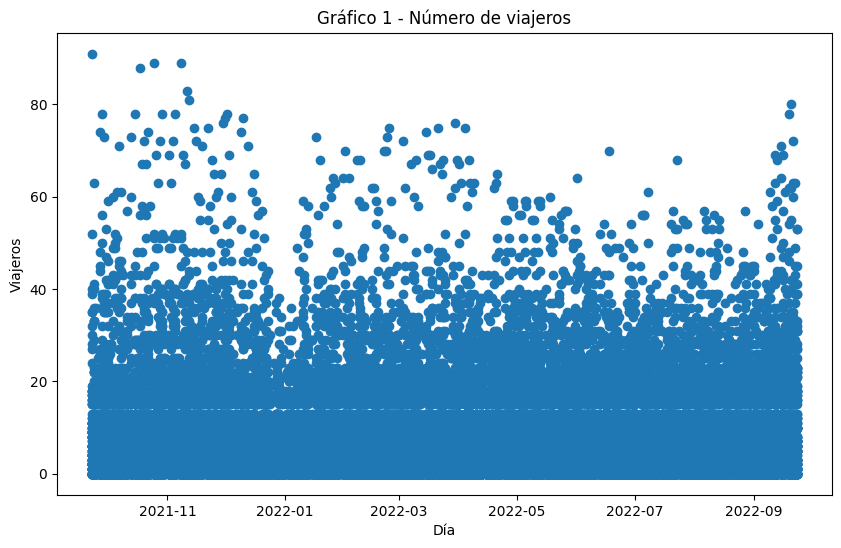

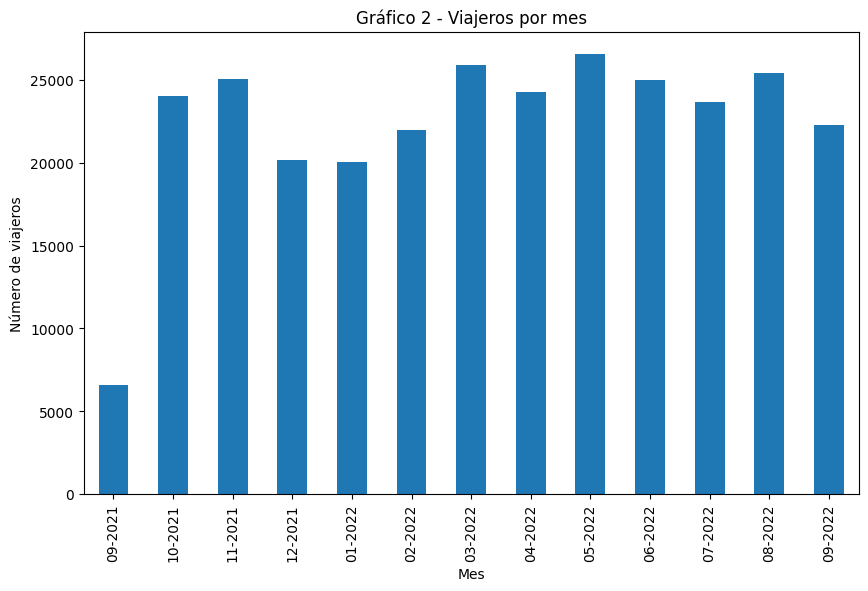

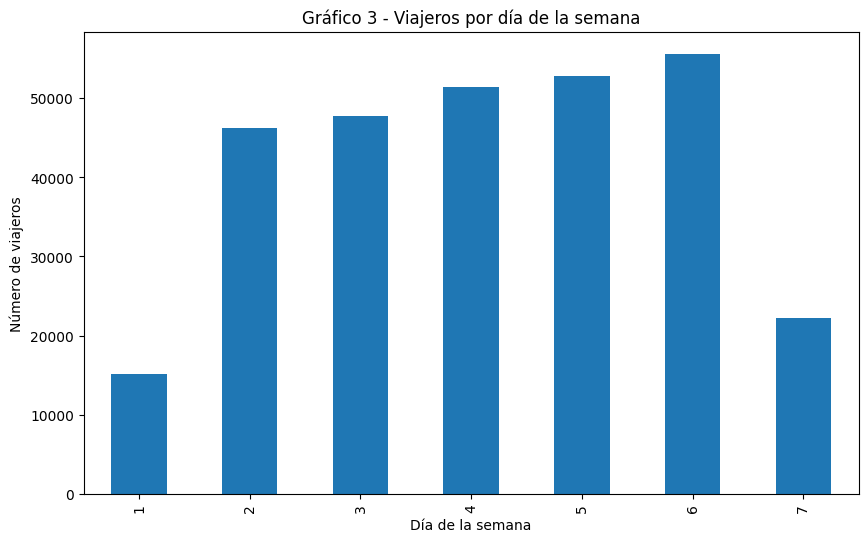

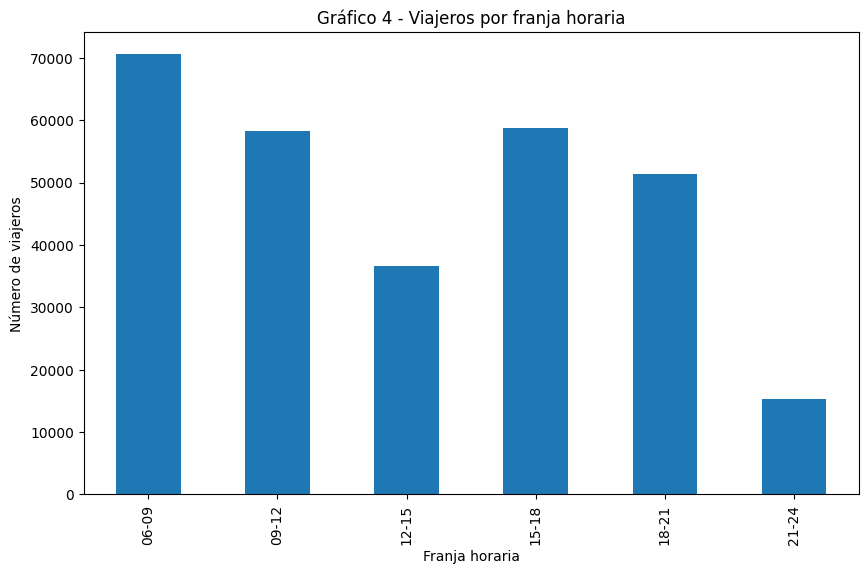

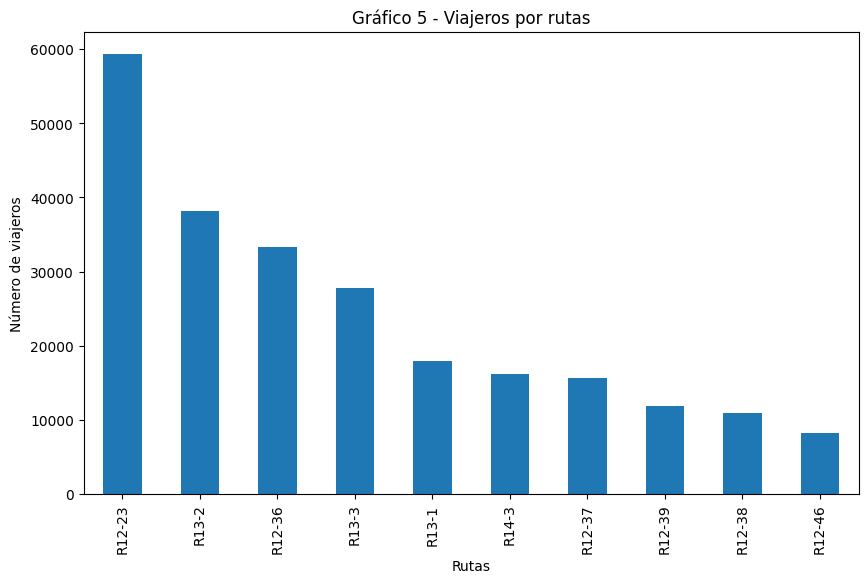

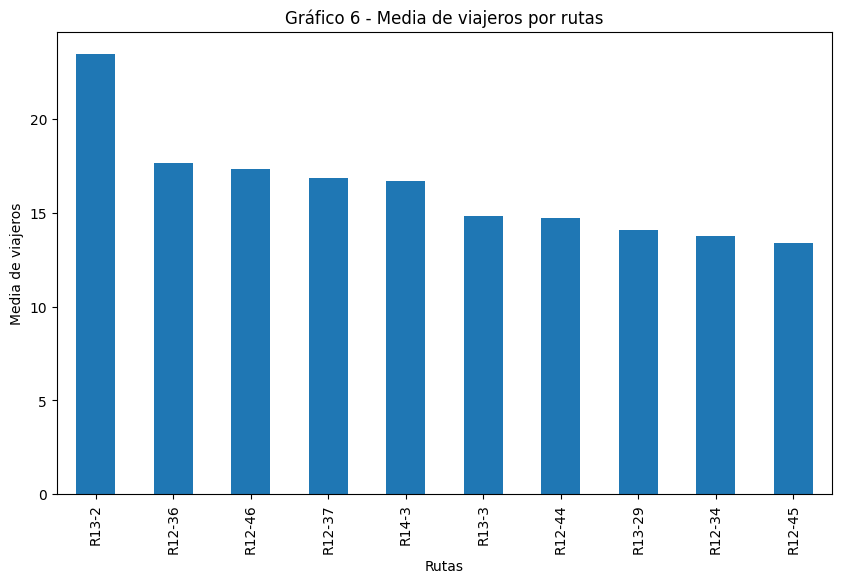

In [ ]:
#Empezamos a construir gráficos en base a analizar nuestros datos.
#En esta celda trabajamos con los viajeros.

import matplotlib.pyplot as plt

#El primer gráfico que solicitamos fue un scatter para mirar un poco el panorama\
#general y comprobar una vez más si tenemos outliers. En eje X colocamos todos\
#los días del año y en el Y los viajeros.

plt.figure(figsize=(10, 6))
plt.scatter(bus_regular["SALIDA"], bus_regular["VIAJEROS"])


plt.xlabel("Día")
plt.ylabel("Viajeros")
plt.title("Gráfico 1 - Número de viajeros")

plt.show()

#En el segundo gráfico tenemos la suma de todos los viajeros en cada mes.
#Antes de crear el gráfico agrupamos los datos y los ordenamos.
#Tuvimos que crear la variable meses para que la label saliera en el formato deseado.

bus_regular_grouped = bus_regular.groupby('MES')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='MES')

meses = bus_regular_sorted['MES'].apply(lambda x: x.strftime('%m-%Y'))
valores = bus_regular_sorted['VIAJEROS']
ax = bus_regular_sorted.plot(x='MES', y='VIAJEROS', kind='bar', figsize=(10, 6), legend=None)

ax.set_xticklabels(meses)

plt.xlabel('Mes')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 2 - Viajeros por mes')

#En el tercer gráfico tenemos la suma de todos los viajeros por tipo de día.
bus_regular_grouped = bus_regular.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='TIPO_DIA')
bus_regular_sorted.plot(x='TIPO_DIA', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Día de la semana')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 3 - Viajeros por día de la semana')

#En el cuarto gráfico tenemos la suma de todos los viajeros por franja horaria.

bus_regular_grouped = bus_regular.groupby('FRANJA_HORARIA')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='FRANJA_HORARIA')
bus_regular_sorted.plot(x='FRANJA_HORARIA', y='VIAJEROS', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Franja horaria')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 4 - Viajeros por franja horaria')

plt.show()

#En los dos siguientes gráficos tenemos una distribución de los viajeros por rutas.
#Primeramente en números absolutos y luego por media.

bus_regular_grouped = bus_regular.groupby('RUTA_U')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_regular_top10 = bus_regular_sorted.head(10)
bus_regular_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 5 - Viajeros por rutas')

bus_regular_grouped = bus_regular.groupby('RUTA_U')['VIAJEROS'].mean().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_regular_top10 = bus_regular_sorted.head(10)
bus_regular_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Media de viajeros')
plt.title('Gráfico 6 - Media de viajeros por rutas')

plt.show()

Vemos en el primer gráfico una evolución más o menos constante del número de viajeros entre 09/2021 y 09/2022.

En el segundo gráfico destacamos los dos meses de septiembre que no están completos, así como el mes de mayo y noviembre (en los cuales faltan datos). Es notorio un crecimiento post-pandemia que se estabiliza en los meses de verano.

En relación al tipo de día, verificamos un resultado más o menos esperado, es decir, menos viajeros en los días de fin de semana, los cuales ofrecen menos expediciones y una ligera supremacía del viernes.

En lo tocante a la franja horaria, es clara la hegemonía de la franja 06-09. Por otro lado, la hora de vuelta no es tan clara y se reparte entre las 15 y las 21. Se destaca también para la franja entre las 9-12 lo que, por un lado, puede indicar una ruptura de los parámetros típicos de viaje que obedecen a los típicos horarios de trabajo y, por otro, representa una generación que utiliza el autobús para los grandes centros hospitalares. Esta posibilidad puede ser confirmada cuando analicemos rutas por separado.

En general, las rutas, tanto por media como por números absolutos siguen el mismo patrón. Hay algunas rutas, especialmente las de la familia R12, que aparecen en el top 10 por media, pero no aparecen en números absolutos.


In [ ]:
correlacion_1 = bus_regular['VIAJEROS'].corr(bus_regular['VIAJEROS/KM'])
correlacion_2 = bus_regular['VIAJEROS'].corr(bus_regular['KM'])
correlacion_3 = bus_regular['VIAJEROS'].corr(bus_regular['DURACION'])
correlacion_4 = bus_regular['VIAJEROS'].corr(bus_regular['VEL_COMERCIAL'])

print(correlacion_1)
print(correlacion_2)
print(correlacion_3)
print(correlacion_4)

0.9505511880599969
0.5660420408893401
0.48766234637894473
-0.11987156806327566


Calculamos las primeras correlaciones y, como era esperable, hay una correlación muy fuerte entre viajeros y viajeros km. Por otro lado, la relación entre el número de viajeros y el recorrido del viaje no es tan fuerte y llega a ser práticamente inexistente entre viajeros y velocidad comercial.


 3.1.2 Análisis por rutas

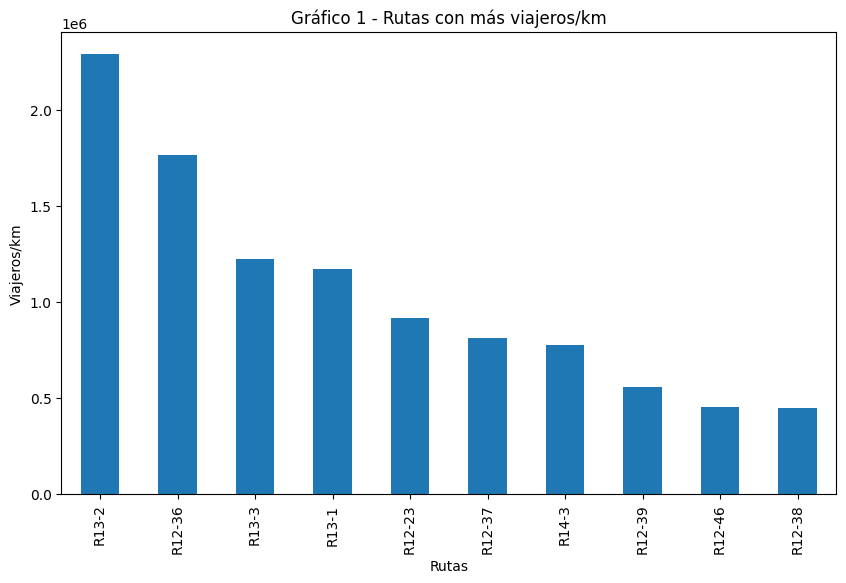

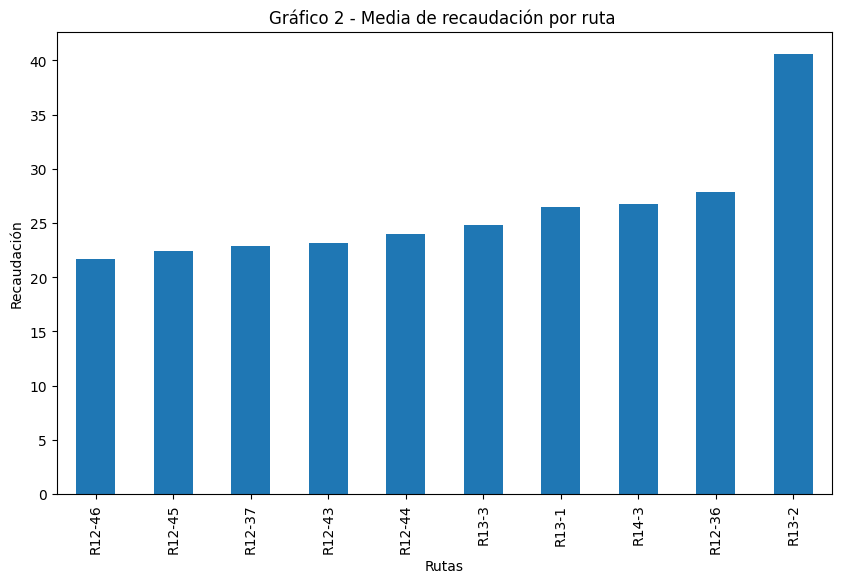

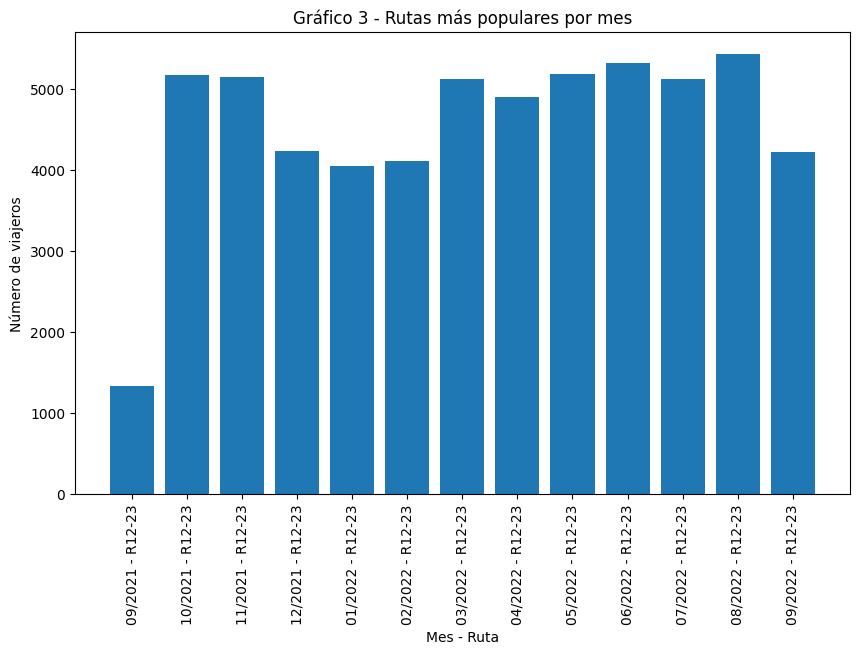

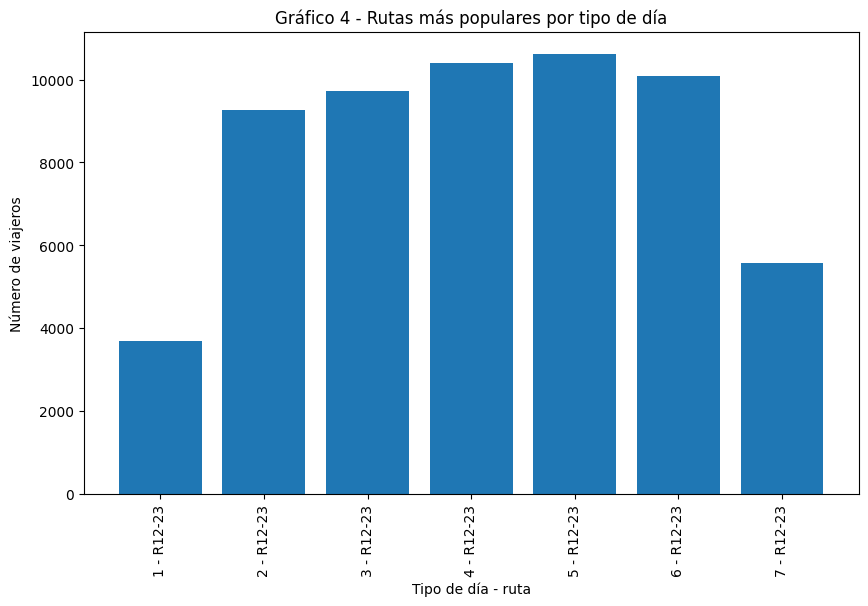

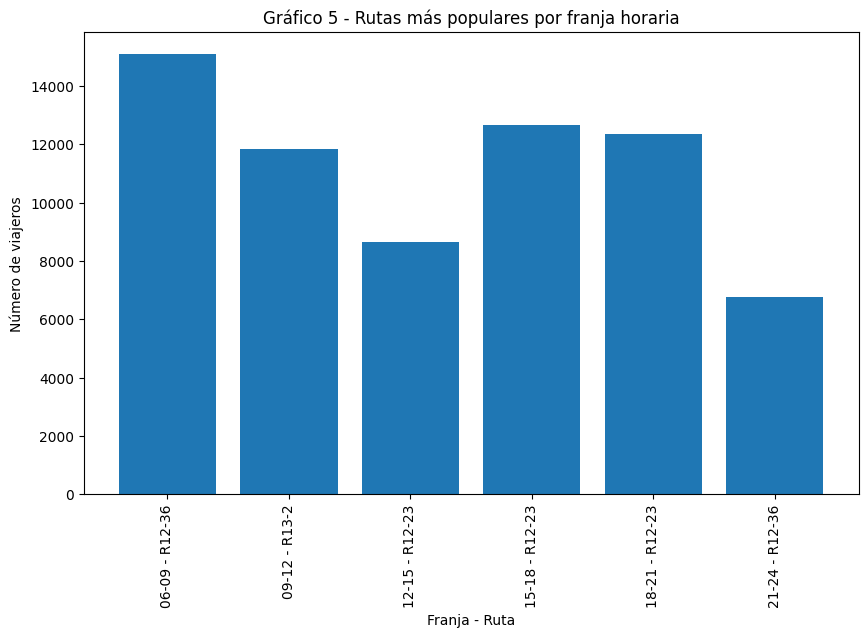

In [ ]:
#En esta celda hacemos un análisis por rutas regulares.

#Empezamos por graficar la productividad de las rutas verificando cuáles son las rutas\
#con más viajeros/km.

bus_regular_top10 = bus_regular.groupby('RUTA_U')['VIAJEROS/KM'].sum().sort_values(ascending=False).head(10).reset_index()
bus_regular_top10_sorted = bus_regular_top10.sort_values(by='VIAJEROS/KM', ascending = False)
bus_regular_top10_sorted.plot(x='RUTA_U', y='VIAJEROS/KM', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Viajeros/km')
plt.title('Gráfico 1 - Rutas con más viajeros/km')

plt.show()


#Repetimos la operación anterior pero esta vez con la recaudación.
bus_regular_top10 = bus_regular.groupby('RUTA_U')['RECAUDA_TOTAL'].mean().sort_values(ascending=False).head(10).reset_index()
bus_regular_top10_sorted = bus_regular_top10.sort_values(by='RECAUDA_TOTAL')
bus_regular_top10_sorted.plot(x='RUTA_U', y='RECAUDA_TOTAL', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Recaudación')
plt.title('Gráfico 2 - Media de recaudación por ruta ')

plt.show()

#Seguidamente quisimos ver cuál era la ruta que tenía más viajeros por mes.
#Empezamos por agrupar los datos que queremos trabajar y luego sacar el valor máximo.
#Luego hicimos un bucle for para obtener la ruta más popular en cada mes.
#Creamos la variable labels con otro bucle for para encontrar la etiqueta\
#correspondiente a la combinación mes/ruta más popular.

rutas_por_mes = bus_regular.groupby(['MES', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_mes.groupby('MES').idxmax()
valores_populares = [rutas_por_mes[m] for m in rutas_populares]
labels = [f"{mes.strftime('%m/%Y')} - {rota}" for mes, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 3 - Rutas más populares por mes')
plt.xlabel('Mes - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

#Repetimos el proceso para el tipo de día y franja horaria.

rutas_por_tipo = bus_regular.groupby(['TIPO_DIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_tipo.groupby('TIPO_DIA').idxmax()
valores_populares = [rutas_por_tipo[m] for m in rutas_populares]
labels = [f"{tipo} - {ruta}" for tipo, ruta in rutas_populares]


plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 4 - Rutas más populares por tipo de día')
plt.xlabel('Tipo de día - ruta')
plt.ylabel('Número de viajeros')

plt.show()

rutas_por_franja = bus_regular.groupby(['FRANJA_HORARIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 5 - Rutas más populares por franja horaria')
plt.xlabel('Franja - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

plt.show()


En el primer gráfico vemos que la ruta R13-2 es la que tiene el más alto índice de viajeros/km. Este resultado era esperable teniendo en consideración que es la ruta con más viajeros y también una de las más largas. Es importante destacar que la ruta R12-23, que es la ruta con más viajeros absolutos, aparece en la tercera posición. Esto se explica por su corto recorrido.


A continuación, el siguiente gráfico nos enseña todas las diferencias y son todas negativas. Como explicamos anteriormente, ninguna línea salió antes de su hora, los conductores sí la abrieron en la máquina antes de su hora.

En lo que toca a recaudación, podemos constatar varias rutas que están en el top 10, que están también en el top 10 de número de viajeros y, como veremos más adelante, hay una correlación entre recaudación y número de viajeros.

En el gráfico 5 vemos una dominancia clara de la ruta R13-2, pero vemos también un aumento del número de viajeros y luego una estabilización en los meses de verano de 2022 cuando cambia la ruta dominante.

En el gráfico 6 verificamos que la ruta R13-2 domina en todos los días laborales y sábado y domingo.

En relación a la franja horaria vemos que las rutas R12-36 y R12-23 reparten el dominio.








3.1.3 Análisis por recaudación

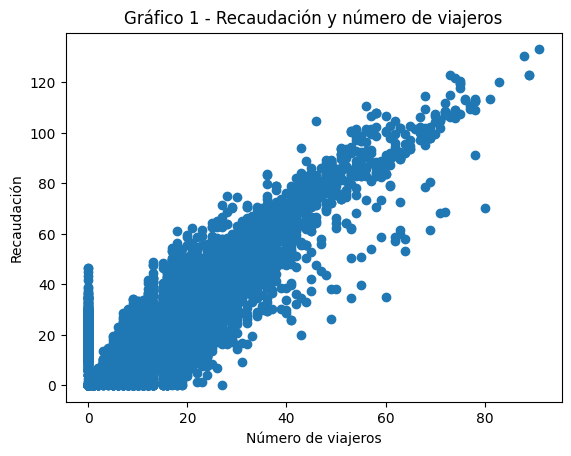

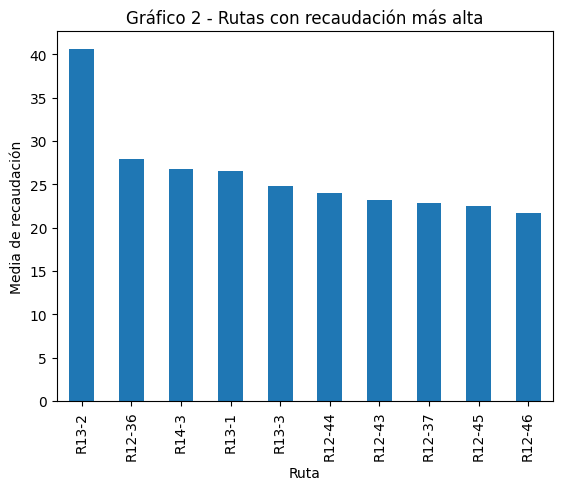

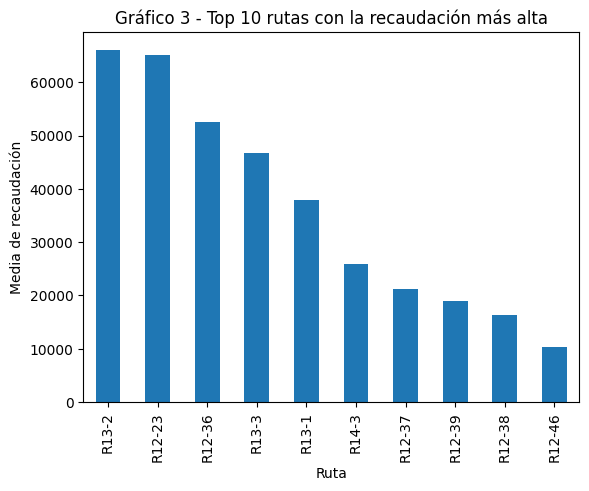

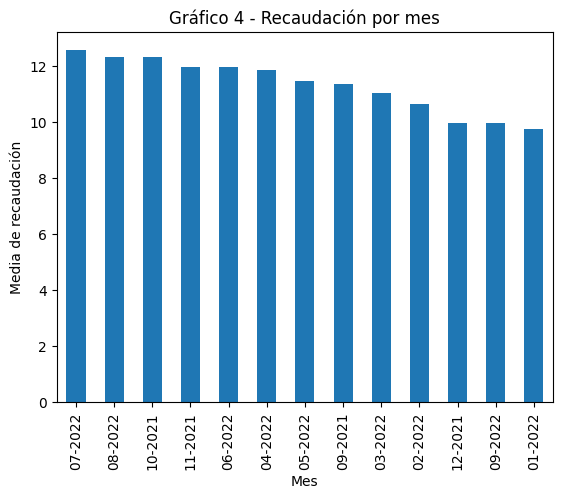

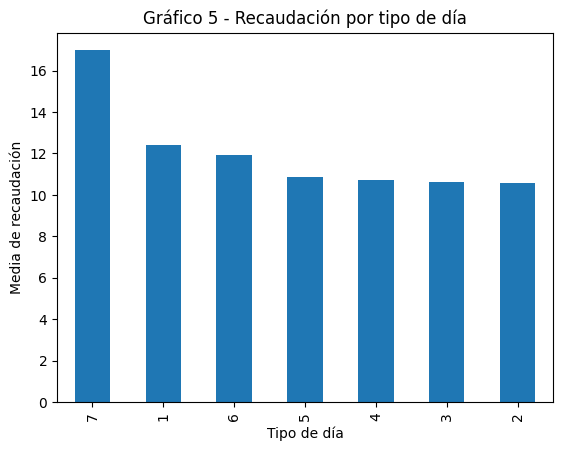

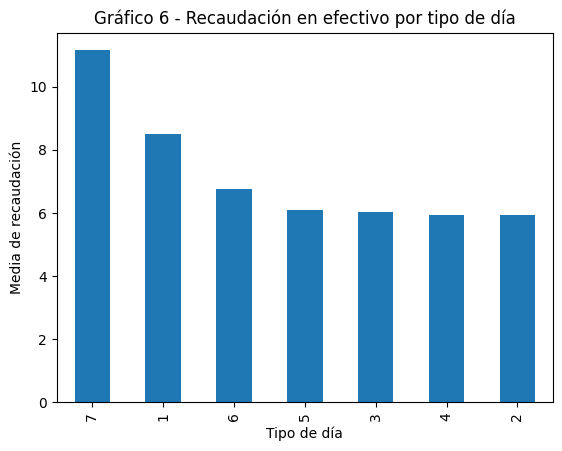

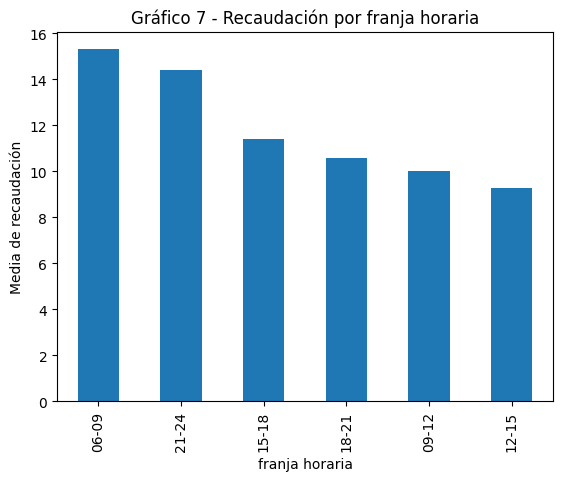

In [ ]:
#En esta celda trabajamos los datos relativos a la recaudación.

#Lo primero a analizar es la relación entre la recaudación y el número de viajeros.

bus_regular_ordenado = bus_regular.sort_values(by=["VIAJEROS"])
plt.scatter(bus_regular_ordenado["VIAJEROS"], bus_regular_ordenado["RECAUDA_TOTAL"])

plt.title("Gráfico 1 - Recaudación y número de viajeros")
plt.xlabel("Número de viajeros")
plt.ylabel("Recaudación")

plt.show()

#Seguidamente analizamos la recaudación por rutas, por media y recaudación total media

recauda_por_ruta = bus_regular.groupby('RUTA_U')['RECAUDA_TOTAL'].mean()
top_10_rutas = recauda_por_ruta.nlargest(10)

top_10_rutas.plot(kind='bar')
plt.title('Gráfico 2 - Rutas con recaudación más alta')
plt.xlabel('Ruta')
plt.ylabel('Media de recaudación')
plt.show()

#Recaudación total

recauda_por_ruta = bus_regular.groupby('RUTA_U')['RECAUDA_TOTAL'].sum()
top_10_rutas = recauda_por_ruta.nlargest(10)

top_10_rutas.plot(kind='bar')
plt.title('Gráfico 3 - Top 10 rutas con la recaudación más alta')
plt.xlabel('Ruta')
plt.ylabel('Media de recaudación')
plt.show()

#Seguidamente, analizamos la relación de recaudación con el mes, tipo de día y franja horaria.

recauda_mes = bus_regular.groupby('MES')['RECAUDA_TOTAL'].mean()
recauda_mes = recauda_mes.sort_values(ascending=False)

meses = recauda_mes.index.strftime('%m-%Y')

recauda_mes.plot(kind='bar')
plt.title('Gráfico 4 - Recaudación por mes')
plt.xlabel('Mes')
plt.ylabel('Media de recaudación')
plt.xticks(range(len(meses)), meses, rotation=90)
plt.show()

#Tipo de día

recauda_t_dia = bus_regular.groupby('TIPO_DIA')['RECAUDA_TOTAL'].mean()
recauda_t_dia = recauda_t_dia.sort_values(ascending=False)

recauda_t_dia.plot(kind='bar')
plt.title('Gráfico 5 - Recaudación por tipo de día')
plt.xlabel('Tipo de día')
plt.ylabel('Media de recaudación')
plt.show()

recauda_t_dia = bus_regular.groupby('TIPO_DIA')['RECAUDA'].mean()
recauda_t_dia = recauda_t_dia.sort_values(ascending=False)

recauda_t_dia.plot(kind='bar')
plt.title('Gráfico 6 - Recaudación en efectivo por tipo de día')
plt.xlabel('Tipo de día')
plt.ylabel('Media de recaudación')
plt.show()

#Franja horaria

recauda_franja = bus_regular.groupby('FRANJA_HORARIA')['RECAUDA_TOTAL'].mean()
recauda_franja = recauda_franja.sort_values(ascending=False)

recauda_franja.plot(kind='bar')
plt.title('Gráfico 7 - Recaudación por franja horaria')
plt.xlabel('franja horaria')
plt.ylabel('Media de recaudación')
plt.show()

plt.show()

El primer gráfico enseña que la recaudación es directamente proporcional al número de viajeros. El mismo gráfico demuestra que algunas entradas están corrompidas. Vemos en el gráfico que algunas recaudaciones son bastante altas cuando se transportaron cero viajeros. Por otro lado, vemos cifras de veinte viajeros transportados y una recaudación de cero.

Vemos también que las recaudaciones por ruta siguen el mismo patrón que el número de viajeros. Es visible que las dos rutas más populares son las que tienen más recaudación. La ruta R13-2 es más larga y, consecuentemente, sus billetes son más caros.

Por otro lado, en términos temporales, no siempre la recaudación acompaña la tendencia del número de viajeros. Por ejemplo, vemos que el día con más recaudación es el sábado. Eso se explica con el hecho de que a los sábados hay más viajeros eventuales, en otras palabras, viajeros que viajan sin tarjeta de descuento.

In [ ]:
correlacion_1 = bus_regular['RECAUDA_TOTAL'].corr(bus_regular['VIAJEROS'])
correlacion_2 = bus_regular['RECAUDA_TOTAL'].corr(bus_regular['KM'])


print(correlacion_1)
print(correlacion_2)

0.9279373258600652
0.6620479698757625


Hay una correlación muy fuerte entre recaudación y el número de viajeros. Hay también una correlación considerable entre la recaudación y la longitud de los recorridos. Estos datos nos parecen perfectamente normales.


***3.2 Análisis de rutas escolares***

3.2.1 Análisis por viajeros

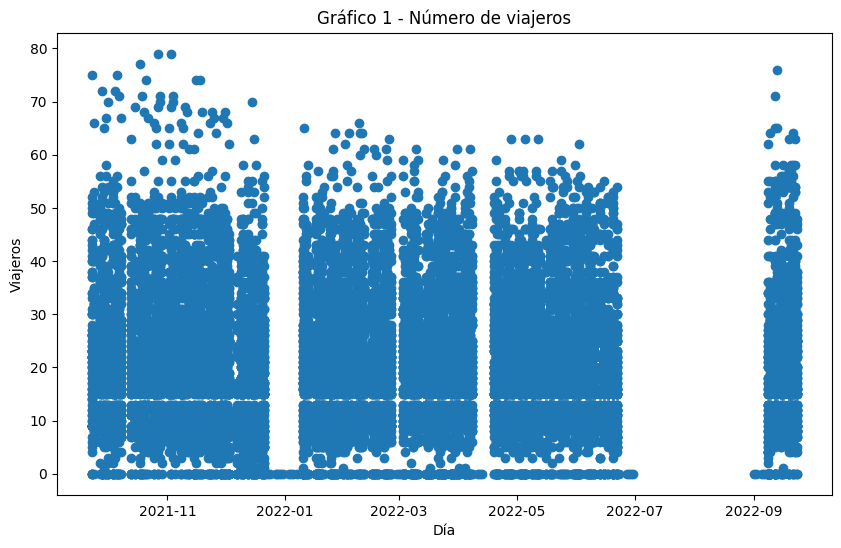

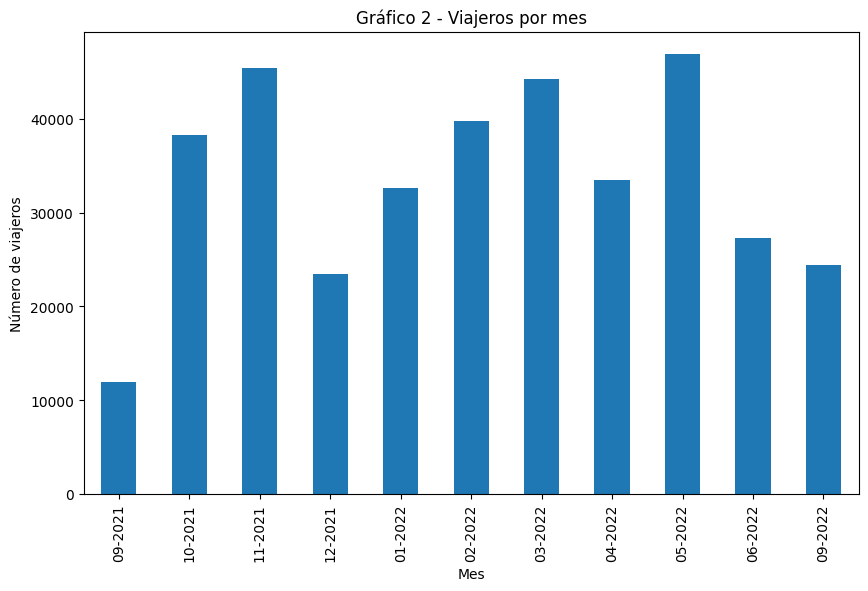

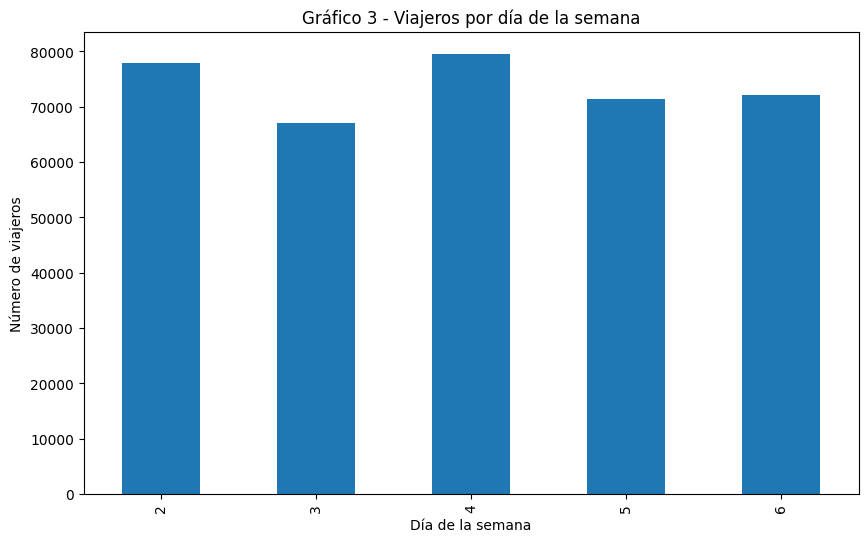

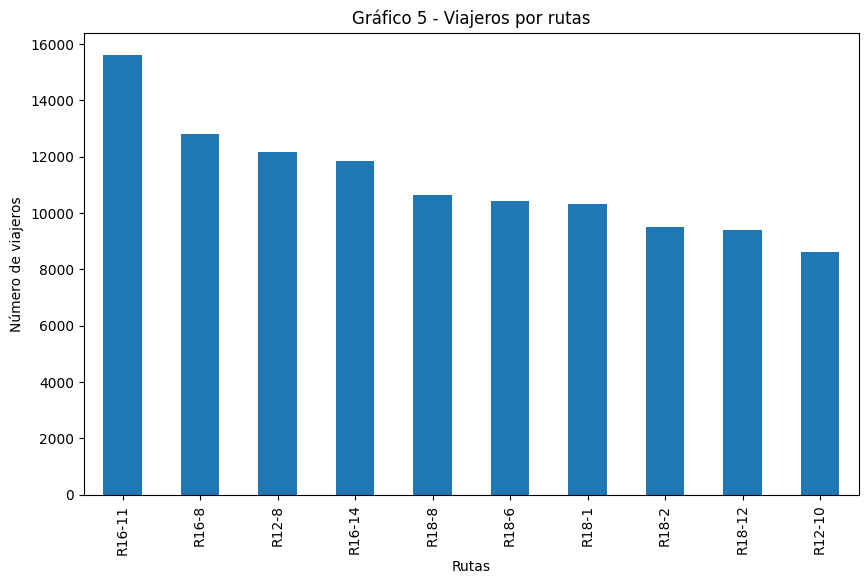

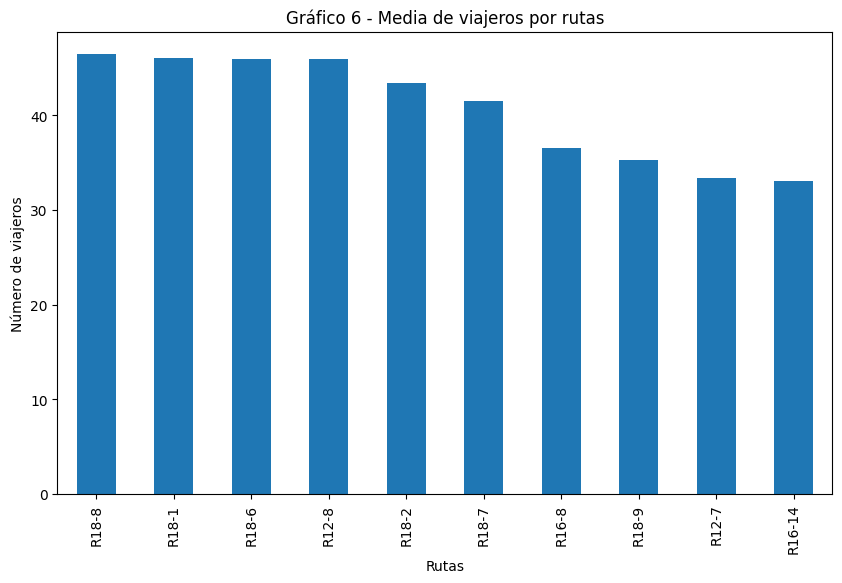

In [ ]:
#A partir de aquí repetimos las operaciones hechas con las líneas regulares en\
#las líneas escolares.
#En esta celda trabajamos con los viajeros.

import matplotlib.pyplot as plt

#El primer gráfico que solicitamos fue un scatter para mirar un poco el panorama\
#general y comprobar una vez más si tenemos outliers. En eje X colocamos todos\
#los días del año y en el Y los viajeros.

plt.figure(figsize=(10, 6))
plt.scatter(bus_escolar["SALIDA"], bus_escolar["VIAJEROS"])

plt.ylabel("Viajeros")
plt.xlabel("Día")
plt.title("Gráfico 1 - Número de viajeros")

plt.show()

#En el segundo gráfico tenemos la suma de todos los viajeros en cada mes.
#Antes de crear el gráfico agrupamos los datos y los ordenamos.
#Tuvimos que crear la variable meses para que la label saliese en el formato deseado.

bus_escolar_grouped = bus_escolar.groupby('MES')['VIAJEROS'].sum().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='MES')

meses = bus_escolar_sorted['MES'].apply(lambda x: x.strftime('%m-%Y'))
valores = bus_escolar_sorted['VIAJEROS']
ax = bus_escolar_sorted.plot(x='MES', y='VIAJEROS', kind='bar', figsize=(10, 6), legend=None)

ax.set_xticklabels(meses)

plt.xlabel('Mes')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 2 - Viajeros por mes')

plt.show()

#En el tercer gráfico tenemos la suma de todos los viajeros por tipo de día.
bus_escolar_grouped = bus_escolar.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='TIPO_DIA')
bus_escolar_sorted.plot(x='TIPO_DIA', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Día de la semana')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 3 - Viajeros por día de la semana')

plt.show()

#En los dos siguientes gráficos tenemos una distribución de los viajeros por rutas.
#Primeramente en números absolutos y luego por media.

bus_escolar_grouped = bus_escolar.groupby('RUTA_U')['VIAJEROS'].sum().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_escolar_top10 = bus_escolar_sorted.head(10)
bus_escolar_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 5 - Viajeros por rutas')

plt.show()

bus_escolar_grouped = bus_escolar.groupby('RUTA_U')['VIAJEROS'].mean().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_escolar_top10 = bus_escolar_sorted.head(10)
bus_escolar_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 6 - Media de viajeros por rutas')

plt.show()

Los análisis de rutas escolares siguen patrones diferentes de las líneas regulares.

Para empezar, hay dos meses al año y dos días a la semana en los cuales no hay expediciones y, consecuentemente, no hay viajeros, que son julio y agosto y sábado y domingo.

El número de viajeros tiene pequeñas variaciones a lo largo de la semana, puesto que hay institutos que tienen clases por las tardes una vez a la semana.

En lo que respecta a la franja horaria hay una clara predominancia de de las tres primeras horas de la mañana. Sin embargo, la falta de viajeros en las demás franjas horarias, especialmente entre 12-15, nos lleva a concluir que gran parte de los datos eliminados por sus daños en la hora de salida se encontraban en esta franja horaria.





In [ ]:
correlacion_1 = bus_escolar['VIAJEROS'].corr(bus_escolar['VIAJEROS/KM'])
correlacion_2 = bus_escolar['VIAJEROS'].corr(bus_escolar['KM'])
correlacion_3 = bus_escolar['VIAJEROS'].corr(bus_escolar['DURACION'])



print(correlacion_1)
print(correlacion_2)
print(correlacion_3)

0.7089570582799595
0.025213200421261177
0.1707441648703194


Si comparamos estas correlaciones con las que fueron obtenidas en las líneas regulares concluimos que las mismas no son tan fuertes. Lo que pone en evidencia la particularidad de los recorridos escolares.

3.2.2 Análisis por rutas

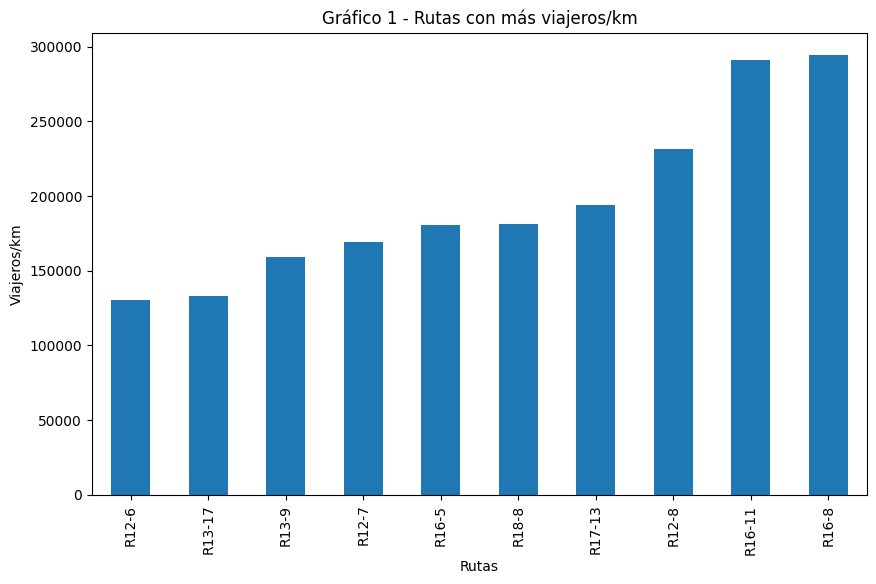

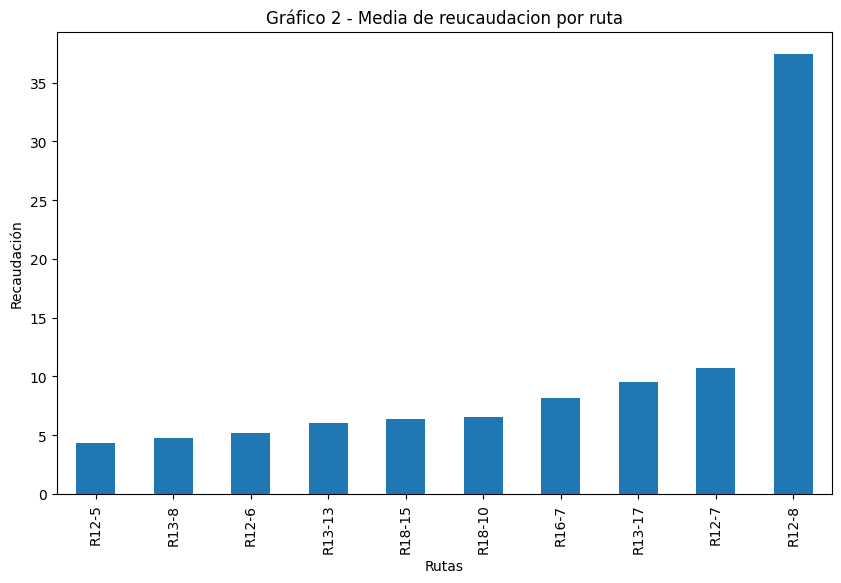

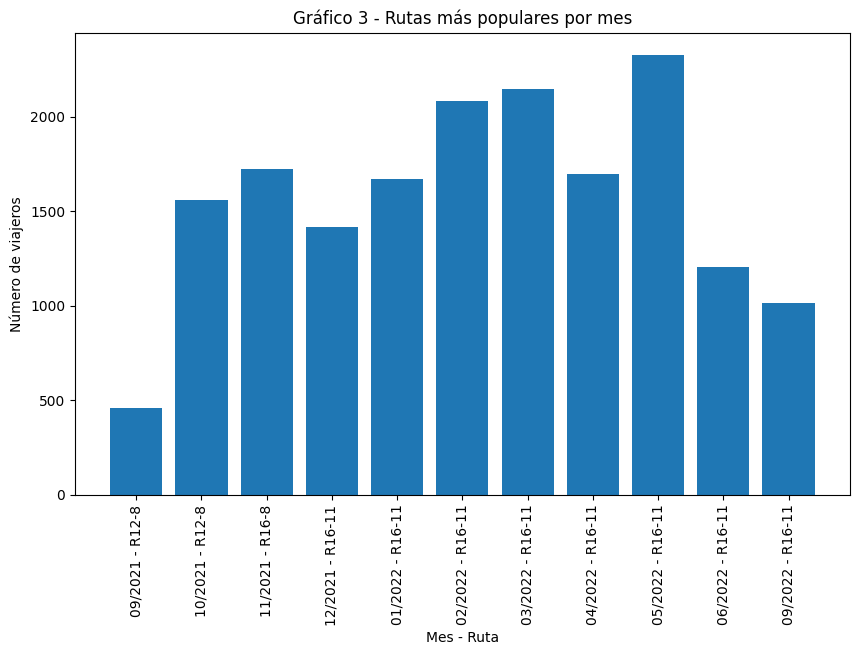

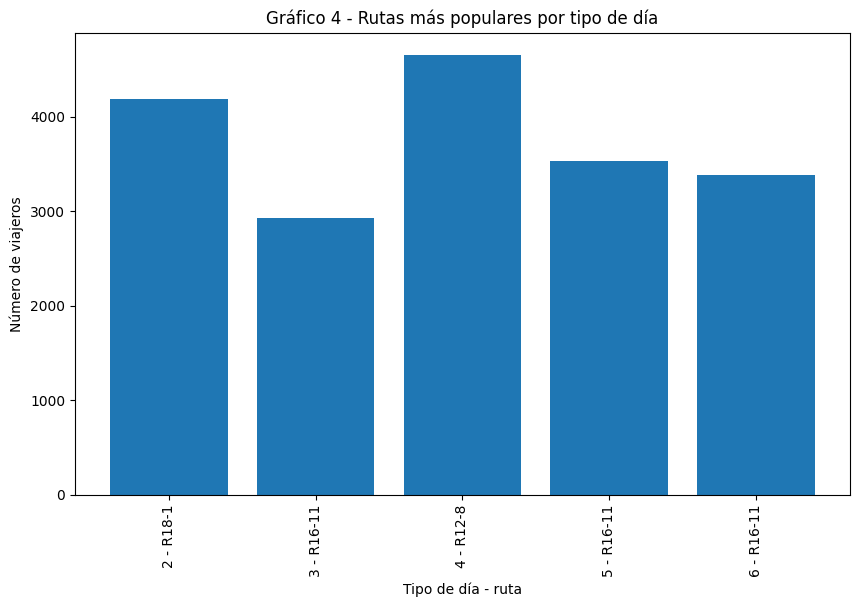

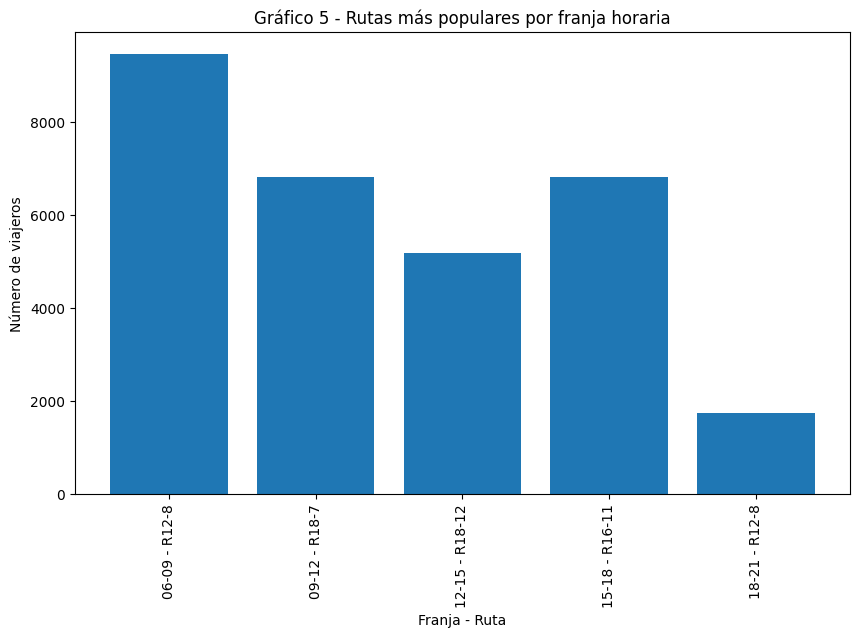

In [ ]:
#En esta celda hacemos un análisis por rutas escolares.

#Empezamos por graficar la productividad de las rutas verificando cuáles son las rutas/
#con más viajeros/km.

bus_escolar_top10 = bus_escolar.groupby('RUTA_U')['VIAJEROS/KM'].sum().sort_values(ascending=False).head(10).reset_index()
bus_escolar_top10_sorted = bus_escolar_top10.sort_values(by='VIAJEROS/KM')
bus_escolar_top10_sorted.plot(x='RUTA_U', y='VIAJEROS/KM', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Viajeros/km')
plt.title('Gráfico 1 - Rutas con más viajeros/km')

plt.show()


#Repetimos la operación anterior, pero esta vez con la recaudación.
bus_escolar_top10 = bus_escolar.groupby('RUTA_U')['RECAUDA_TOTAL'].mean().sort_values(ascending=False).head(10).reset_index()
bus_escolar_top10_sorted = bus_escolar_top10.sort_values(by='RECAUDA_TOTAL')
bus_escolar_top10_sorted.plot(x='RUTA_U', y='RECAUDA_TOTAL', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Recaudación')
plt.title('Gráfico 2 - Media de reucaudacion por ruta')

plt.show()

#Seguidamente quisimos ver cuál era la ruta que tenía más viajeros por mes.
#Empezamos por agrupar los datos con los que queremos trabajar y luego sacar el valor máximo.
#Luego hicimos un bucle for para obtener la ruta más popular en cada mes.
#Creamos la variable labels con otro bucle for para encontrar la etiqueta\
#correspondiente a la combinacion mes/ruta más popular.

rutas_por_mes = bus_escolar.groupby(['MES', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_mes.groupby('MES').idxmax()
valores_populares = [rutas_por_mes[m] for m in rutas_populares]
labels = [f"{mes.strftime('%m/%Y')} - {rota}" for mes, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 3 - Rutas más populares por mes')
plt.xlabel('Mes - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

#Repetimos el proceso para el tipo de día y franja horaria.

rutas_por_tipo = bus_escolar.groupby(['TIPO_DIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_tipo.groupby('TIPO_DIA').idxmax()
valores_populares = [rutas_por_tipo[m] for m in rutas_populares]
labels = [f"{tipo} - {ruta}" for tipo, ruta in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 4 - Rutas más populares por tipo de día')
plt.xlabel('Tipo de día - ruta')
plt.ylabel('Número de viajeros')

plt.show()

rutas_por_franja = bus_escolar.groupby(['FRANJA_HORARIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 5 - Rutas más populares por franja horaria')
plt.xlabel('Franja - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

Analizando los datos escolares por rutas concluimos, primeramente, que la distribución por viajeros-km sigue un patrón muy parecido a la distribución del número de viajeros.

En los restantes gráficos vemos una predominancia de la ruta R16-11, tanto en los diferentes días de la semana, excepto lunes y miércoles. Hay que notar que esta ruta no tiene expediciones puntuales por las tardes.


3.2.3 Análisis por recaudación


No consideramos oportuno un análisis de los datos por recaudación en las rutas escolares puesto que no todos los usuarios realizan un pago y como tal sería un análisis corrompido.

***3.3 Análisis de dos rutas regulares específicas***

Seguiremos con nuestro análisis eligiendo dos rutas en particular:


*   R13-2, una ruta que conecta pueblos de entorno rural a una ciudad de dimensión de capital de provincia.

*   R12-23, una ruta que conecta un pueblo industrial y sus afueras a la ciudad referida anteriormente.



In [ ]:
R13_2 = bus.groupby('RUTA_U').get_group('R13-2')
R12_23 = bus.groupby('RUTA_U').get_group('R12-23')

In [ ]:
R13_2.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,DURACION,DIFERENCIA,TIPO_DIA,KM,VIAJEROS/KM,VEL_COMERCIAL
count,1627.000000,1627.00000,1627.000000,1627.000000,1627.000000,1627.000000,1498.000000,1562.000000,1627.000000,1627.0,1627.000000,1498.000000
mean,49.229256,2414.28949,23.473264,28.039797,12.557081,40.596878,111.568091,-4.982074,4.042409,60.0,1408.395821,33.097141
std,19.488974,654.48936,13.132956,15.180479,10.773831,21.552465,22.061606,8.169783,1.690010,0.0,787.977354,4.887546
min,4.000000,698.00000,0.000000,0.000000,0.000000,0.000000,43.000000,-58.000000,1.000000,60.0,0.000000,8.470588
25%,38.000000,1562.00000,15.000000,17.265000,5.000000,24.020000,102.000000,-8.000000,3.000000,60.0,900.000000,31.034483
50%,52.000000,2494.00000,21.000000,25.700000,9.430000,36.180000,109.000000,-5.000000,4.000000,60.0,1260.000000,33.027523
75%,63.000000,2764.00000,32.000000,37.450000,16.700000,54.275000,116.000000,-2.000000,5.000000,60.0,1920.000000,35.294118
max,88.000000,3420.00000,68.000000,86.500000,51.930000,108.030000,425.000000,58.000000,7.000000,60.0,4080.000000,83.720930


In [ ]:
R12_23.head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
8429,34,07:30:00,2474,0,3.10,5.28,8.38,2022-09-06,2022-09-01,09:33:00,...,26.0,123.0,06-09,3,R12-23-1,R12-23,16,REGULAR,0,36.923077
43737,55,09:00:00,3402,5,4.65,1.76,6.41,2022-01-08,2022-01-01,10:00:00,...,55.0,60.0,09-12,7,R12-23-2,R12-23,16,REGULAR,80,17.454545
22333,14,10:30:00,2496,1,1.55,0.00,1.55,2021-09-26,2021-09-01,11:27:00,...,21.0,57.0,09-12,1,R12-23-1,R12-23,15,REGULAR,15,42.857143
18314,50,19:30:00,3402,7,4.60,3.52,8.12,2022-08-13,2022-08-01,20:19:00,...,30.0,49.0,18-21,7,R12-23-1,R12-23,16,REGULAR,112,32.000000
35512,16,19:30:00,2072,4,3.10,1.76,4.86,2021-10-02,2021-10-01,20:06:00,...,33.0,36.0,18-21,7,R12-23-1,R12-23,16,REGULAR,64,29.090909


In [ ]:
R12_23.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,DURACION,DIFERENCIA,TIPO_DIA,KM,VIAJEROS/KM,VEL_COMERCIAL
count,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8793.000000,8917.000000,8977.000000,8977.000000,8977.000000,8793.000000
mean,43.877687,2502.814637,6.611897,3.706129,3.663181,7.369310,33.584101,-6.713917,4.026401,15.429542,102.357469,29.597198
std,27.407598,777.960746,4.787716,11.143899,2.828131,11.829717,11.771482,10.349529,1.811553,0.495038,74.934535,7.550883
min,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-155.000000,1.000000,15.000000,0.000000,2.601156
25%,18.000000,1886.000000,3.000000,1.550000,1.760000,3.520000,28.000000,-9.000000,3.000000,15.000000,48.000000,25.714286
50%,42.000000,2486.000000,6.000000,3.100000,3.080000,6.160000,31.000000,-5.000000,4.000000,15.000000,90.000000,30.000000
75%,75.000000,3286.000000,9.000000,4.650000,5.280000,9.930000,36.000000,-2.000000,6.000000,16.000000,135.000000,33.333333
max,90.000000,9299.000000,45.000000,1004.640000,22.000000,1015.200000,346.000000,123.000000,7.000000,16.000000,720.000000,180.000000


In [ ]:
#Cálculo del porcentaje de pagos con tarjeta metropolitana.

Efectivo = R13_2['RECAUDA'].sum()
Tarjeta_metropolitana = R13_2['RECAUDATJT'].sum()
Total = R13_2['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

Efectivo = R12_23['RECAUDA'].sum()
Tarjeta_metropolitana = R12_23['RECAUDATJT'].sum()
Total = R12_23['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

30.9311484801469
49.70860548747398


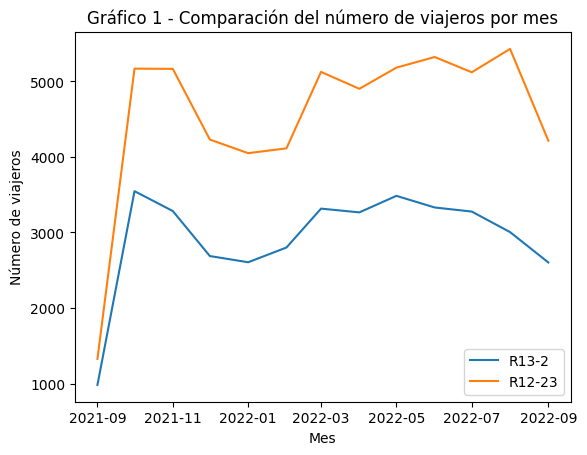

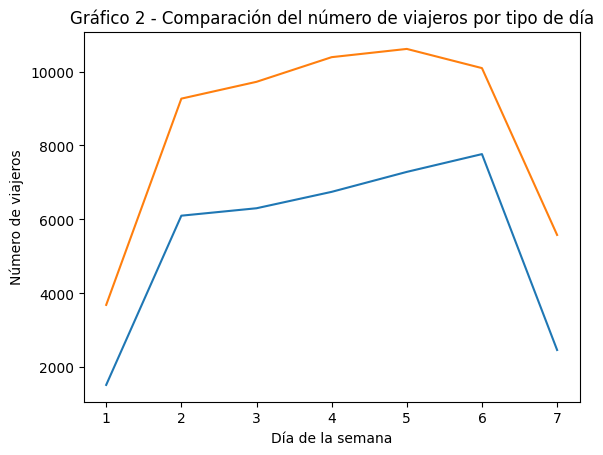

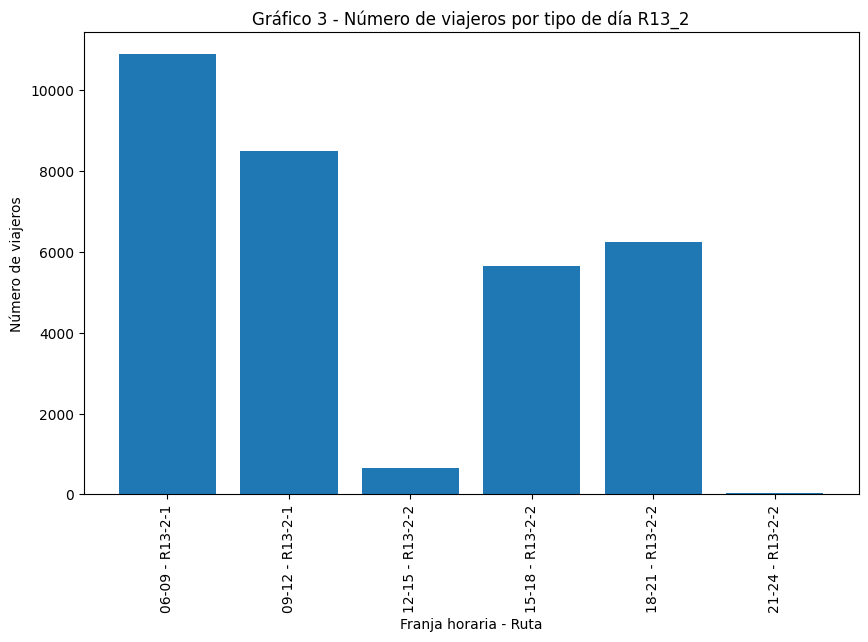

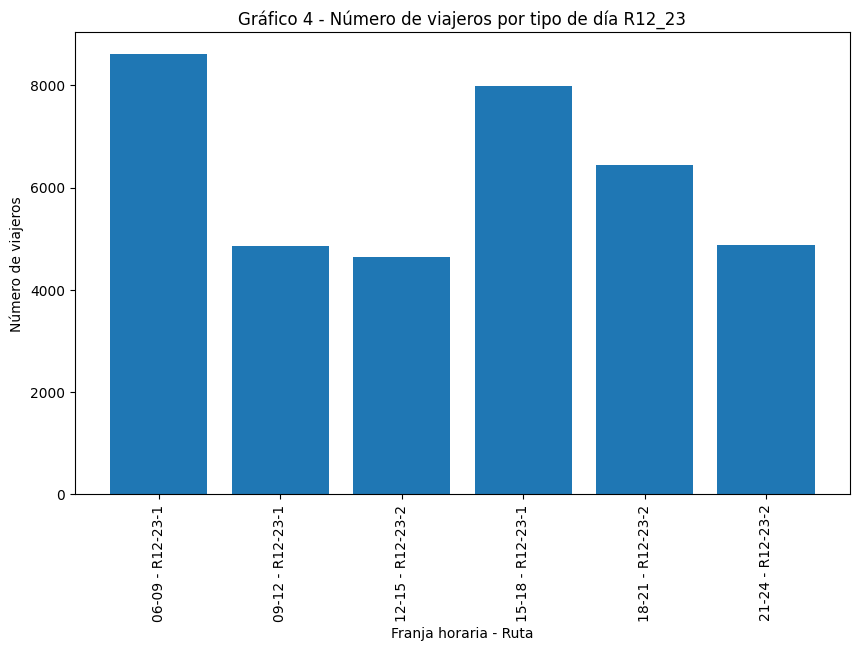

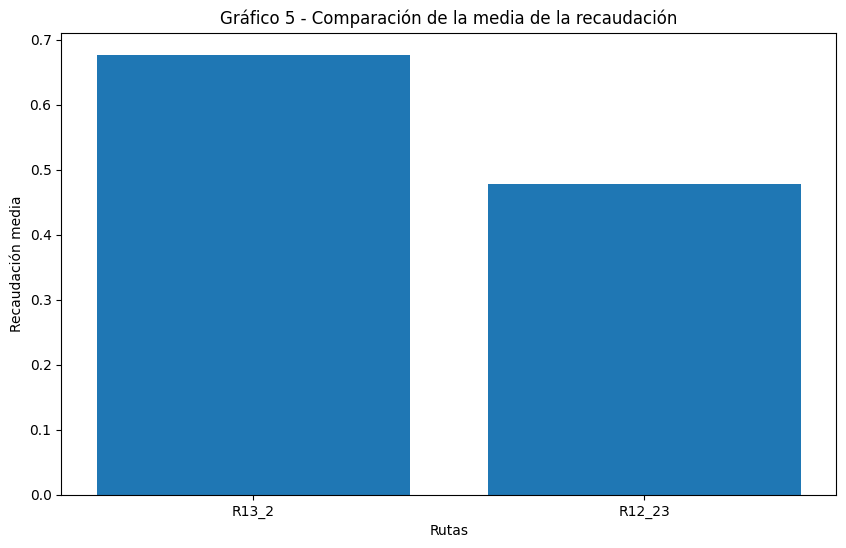

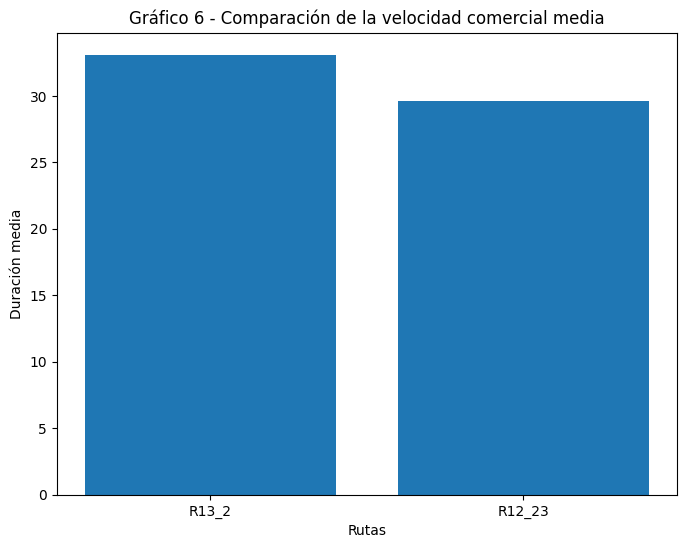

In [ ]:
#Empezamos a construir gráficos en base a analizar nuestros datos.

import matplotlib.pyplot as plt

#Empezamos por un gráfico de líneas que compara el número de viajeros por mes entre las dos líneas.

R13_2_grouped = R13_2.groupby('MES')['VIAJEROS'].sum().reset_index()
R13_2_sorted = R13_2_grouped.sort_values(by='MES')

R12_23_grouped = R12_23.groupby('MES')['VIAJEROS'].sum().reset_index()
R12_23_sorted = R12_23_grouped.sort_values(by='MES')

plt.plot(R13_2_sorted['MES'], R13_2_sorted['VIAJEROS'], label='R13-2')
plt.plot(R12_23_sorted['MES'], R12_23_sorted['VIAJEROS'], label='R12-23')

plt.xlabel('Mes')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 1 - Comparación del número de viajeros por mes')

plt.legend()
plt.show()

#Repetimos el proceso con el tipo de día.

R13_2_grouped = R13_2.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
R13_2_sorted = R13_2_grouped.sort_values(by='TIPO_DIA')

R12_23_grouped = R12_23.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
R12_23_sorted = R12_23_grouped.sort_values(by='TIPO_DIA')

plt.plot(R13_2_sorted['TIPO_DIA'], R13_2_sorted['VIAJEROS'], label='R13-2')
plt.plot(R12_23_sorted['TIPO_DIA'], R12_23_sorted['VIAJEROS'], label='R12-23')

plt.xlabel('Día de la semana')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 2 - Comparación del número de viajeros por tipo de día')

#Volvemos a repetir con la franja horaria.
#En este caso tuvimos que colocar las dos rutas en gráficos diferentes.

rutas_por_franja = R13_2.groupby(['FRANJA_HORARIA', 'RUTA'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]


plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.xlabel('Franja horaria - Ruta')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 3 - Número de viajeros por tipo de día R13_2')

plt.show()

rutas_por_franja = R12_23.groupby(['FRANJA_HORARIA', 'RUTA'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.xlabel('Franja horaria - Ruta')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 4 - Número de viajeros por tipo de día R12_23')

plt.show()

#En el gráfico 3 se demuestra la recaudación por km de cada una de las rutas.
#Una vez que las dos rutas tienen longitud muy distinta no sería correcto analizar\
#la recaudación absoluta.

recauda_total1 = R13_2['RECAUDA_TOTAL'].mean()/R13_2['KM'].mean()
recauda_total2 = R12_23['RECAUDA_TOTAL'].mean()/R12_23['KM'].mean()

datos = [recauda_total1, recauda_total2]
labels = ['R13_2', 'R12_23']

plt.figure(figsize=(10, 6))
plt.bar(labels, datos)
plt.xlabel('Rutas')
plt.ylabel('Recaudación media')
plt.title('Gráfico 5 - Comparación de la media de la recaudación')
plt.show()


#En esta fase comparamos las dos rutas según su velocidad comercial.

media_duracion1 = R13_2['VEL_COMERCIAL'].mean()
media_duracion2 = R12_23['VEL_COMERCIAL'].mean()

datos = [media_duracion1, media_duracion2]
labels = ['R13_2', 'R12_23']

plt.figure(figsize=(8, 6))
plt.bar(labels, datos)
plt.xlabel('Rutas')
plt.ylabel('Duración media')
plt.title('Gráfico 6 - Comparación de la velocidad comercial media')
plt.show()

Empezando por el gráfico 1, podemos ver que la R12-23 es más popular pero también podemos ver que las dos rutas siguen las mismas tendencias. Y por supuesto, se notan claramente la falta de datos en mayo de 2021 y en los dos meses de septiembre.

En relación a los tipos de día, las dos líneas siguen la tendencia general de las líneas regulares. En otras palabras, asistimos a poco movimiento durante los días de fin de semana y bastante durante los días laborales. Durante los mismos vemos una pequeña tendencia de subida a medida que nos acercamos al viernes.

En los gráficos 3 y 4 decidimos separar las rutas por ida y vuelta. Y aquí vemos diferencias entre las dos rutas. Mientras en la R13-2, una ruta larga que conecta entornos rurales con entorno urbano, tiene los movimientos pendulares muy bien marcados. En otras palabras, los viajeros se mueven más en el sentido de la ciudad hasta las 12h y luego empiezan a volver al interior de la provincia a partir de las 15:00.

Por otro lado, la R12_23 no tiene sus movimientos tan claros. Esto se puede explicar por su naturaleza en la cual hay movimientos de trabajo en ambos los sentidos (de un lado tenemos la ciudad y del otro un pueblo altamente industrial que tiene la capacidad de atraer tráfico). La longitud de la ruta, cerca de 20 km, y la elevada frecuencia de expediciones permite que la gente pueda hacer varios trayectos al día.

El gráfico 5 demuestra que la R13_2 presenta una recaudación por km un poco más elevada. Este valor puede dejar dudas puesto que, como vimos, hay una correlación fuerte entre recaudación y el número de viajeros y esta ruta tiene menos viajeros que la R12_23. Esto se explica por el elevado porcentaje de pagos en efectivo que presupone una tarifa más alta.

Por fin, tenemos una comparación de las velocidades comerciales de cada una de las rutas. La R13_2 presenta una velocidad más atractiva lo que se explica por su recorrido en zonas menos densidad poblacional, y consecuentemente, con menos paradas.

#***4. Construcción de un modelo***

El siguiente paso es construir un modelo que pueda predecir el número de viajeros de la ruta R12_23 y R13_2.

Para ello, decidimos construir un modelo de series temporales. Consideramos que los modelos de series temporales son los más adecuados para prever el número de viajeros en transporte público, esencialmente por su sazonalidad. Es decir, el número de viajeros de una línea de autobús varía a lo largo del día, de la semana y del año.

Este tipo de modelo es, también, de utilidad ya que existe una dependencia del número de viajeros en relación a fechas pasadas.

Por su simplicidad y por la dimensión de la base de datos este modelo tiene un coste computacional bastante bajo.






In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

R12_23 = R12_23.sort_values('SALIDA')

#Convertimos la columna SALIDA (fechas) en días de semana y meses, una vez que\
#el número de viajeros oscila por tipos de días de semana y por meses.

R12_23['FECHA'] = R12_23['SALIDA'].dt.dayofweek
R12_23['MES_NUMERICO'] = R12_23['SALIDA'].dt.month

num_lags = 7 #Consideramos siete lags que corresponden a los siete días de la semana.
for i in range(1, num_lags+1):
    R12_23[f'FECHA_Lag{i}'] = R12_23['FECHA'].shift(i)

num_lags = 3 #Consideramos tres meses puesto que la variación anual es progresiva.
for i in range(1, num_lags+1):
    R12_23[f'MES_NUMERICO_Lag{i}'] = R12_23['MES_NUMERICO'].shift(i)

R12_23 = R12_23.dropna() #Borramos las líneas con valores nulos.

#Variables exógenas
X = R12_23[['FECHA_Lag1', 'FECHA_Lag2', 'FECHA_Lag3', 'FECHA_Lag4', 'FECHA_Lag5', 'FECHA_Lag6', 'FECHA_Lag7', 'MES_NUMERICO_Lag1', 'MES_NUMERICO_Lag2', 'MES_NUMERICO_Lag3']]
y = R12_23['VIAJEROS']

split_index = int(0.8 * len(X)) #Corte de datos en 80% para entrenamiento y 20% para test.

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

model = LinearRegression() #Definimos el modelo.
model.fit(X_train, y_train) #Entrenamos el modelo.

y_pred = model.predict(X_test) #Cálculo de prediciones.

mae_test = mean_absolute_error(y_test, y_pred) #Error medio absoluto.
print('Mean Absolute Error (Test Set):', mae_test)

y_pred_cv = model.predict(X) #Cálculo de previsiones bajo el método de cross validation.

#Creamos los siguientes ítems para la construcción del gráfico y representar la\
#división de las fechas del año el train y test.
fechas_train = R12_23.iloc[0:len(X_train), R12_23.columns.get_loc('SALIDA')]
fechas_test = R12_23.iloc[len(X_train):, R12_23.columns.get_loc('SALIDA')]

mae_cv = mean_absolute_error(y, y_pred_cv) #Error medio absoluto.
print('Mean Absolute Error (Cross-Validation):', mae_cv)

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Error cuadrado medio.
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Error (Test Set): 3.8390496951034048
Mean Absolute Error (Cross-Validation): 3.5522922967564163
Root Mean Squared Error (RMSE): 5.2520787329527625


***Métricas***

Este modelo, siendo un modelo time series, no deja de ser un modelo de regresión y, como tal, consideramos que las métricas MAE y RMSE son las más indicadas para medir el desempeño del modelo.

En el caso del MAE consideramos dos tipos: test set y cross validation.

El valor MAE demuestra el desempeño del modelo en relación a los valores reales. Básicamente es la media de las diferencias entre los valores reales y los valores predecidos. En el caso del test set usamos solamente los valores del test mientras que en el cross validation usamos toda la muestra.

En este caso tenemos una diferencia de 4 viajeros en relación a los números reales.

El RMSE tiene la misma función que los anteriores pero usa diferencias cuadráticas.

***Hiperparametros***

Los hiperparametros de este modelo son los lags, es decir, las unidades temporales que usamos para predicir la siguiente. En este caso usamos lags de días y de meses. Usamos 7 días atrás para predicir el octavo día y tres meses atrás para predicir el cuarto.

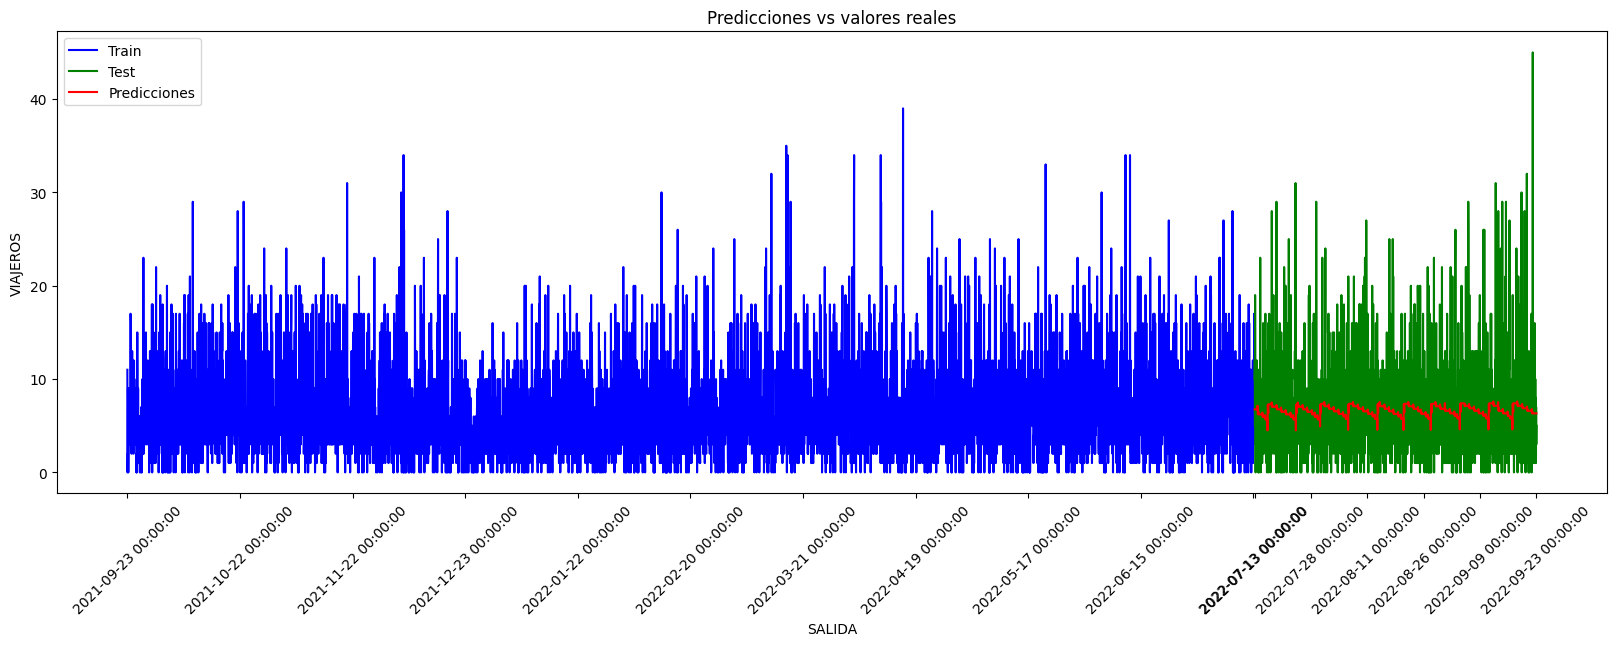

In [ ]:
#Graficamos el modelo donde representamos las predicciones bien como la separación\
#de las fechas que corresponden a train y test.

plt.figure(figsize=(20, 6))

x_range_train = range(len(y_train))
x_range_test = range(len(y_train), len(y_train) + len(y_test))

step_train = len(x_range_train) // 10
step_test = len(x_range_test) // 5

plt.plot(x_range_train, y_train, color='blue', label='Train')
plt.plot(x_range_test, y_test, color='green', label='Test')
plt.plot(x_range_test, y_pred, color='red', label='Predicciones')

plt.title('Predicciones vs valores reales')
plt.xlabel('SALIDA')
plt.ylabel('VIAJEROS')

plt.xticks(list(x_range_train)[::step_train] + list(x_range_test)[::step_test], list(fechas_train.iloc[::step_train]) + list(fechas_test.iloc[::step_test]), rotation=45)
plt.legend()

plt.show()

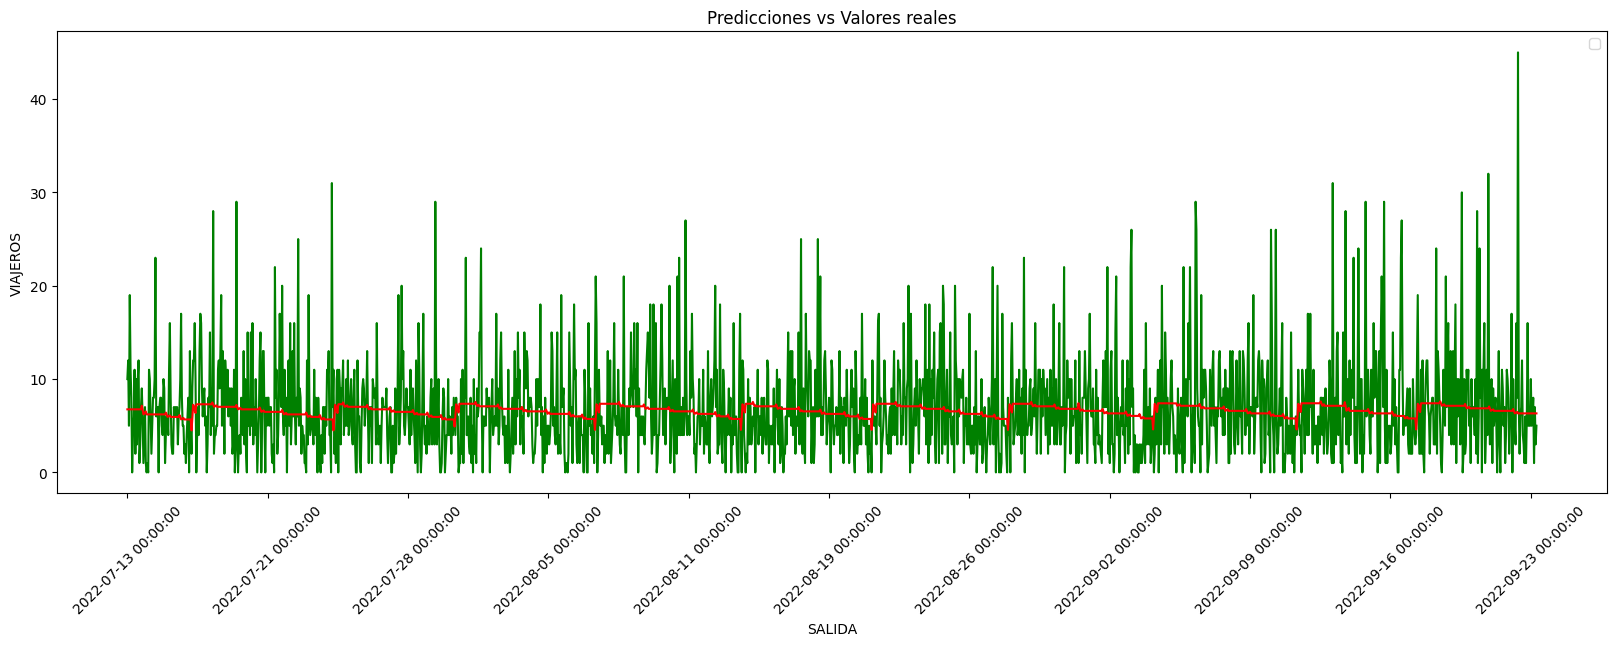

In [ ]:
#Graficamos las predicciones junto con las fechas que corresponden al test.


plt.figure(figsize=(20, 6))

x_range = range(len(y_train), len(y_train) + len(y_test))
step = len(x_range) // 10


plt.plot(x_range, y_test, color='green')
plt.plot(x_range, y_pred, color='red')

plt.title('Predicciones vs Valores reales')
plt.xlabel('SALIDA')
plt.ylabel('VIAJEROS')

plt.xticks(x_range[::step], fechas_test.iloc[::step], rotation=45)
plt.legend()

plt.show()

Este modelo presenta una gran utilidad para la empresa de autobuses que cubre esta línea.

Por un lado, tiene ahora una herramienta muy poderosa para poder asignar recursos para esta línea. Es decir, sabe ahora cual son los vehículos más adecuados para esta línea.

Por otro lado, tiene datos para poder predecir la recaudación futura y encarar de otra forma los presupuestos.

Consideramos que este modelo podría ser mejorado haciendo previsiones al nivel horario. Esta mejora permitiría una optimización operacional y un mejor desarollo estratégico, es decir, se podrían planificar nuevas frecuencias o eliminar otras cuyas previsiones no sean tan fuertes.